In [3]:
import os
current_path = os.getcwd()
import numpy as np
from numpy import seterr
seterr(all='raise')
import matplotlib.pyplot as plt
import math
import random
from tqdm import tqdm
import sys
sys.path.append(current_path)
sys.path.append(current_path+'/../../')
import myInput
import PACKAGE_MP_Linear as linear2d
import post_processing
import PACKAGE_MP_3DLinear as Linear_3D
import PACKAGE_MP_3DVertex as Vertex_3D
sys.path.append(current_path+'/../calculate_tangent/')

import importlib
importlib.reload(post_processing)
importlib.reload(Linear_3D)
importlib.reload(linear2d)


<module 'PACKAGE_MP_Linear' from '/home/lin.yang/projects/VECTOR/examples/GB_velocity/../../PACKAGE_MP_Linear.py'>

In [2]:
if __name__ == '__main__':
    # File name
    data_file_folder = "/blue/michael.tonks/lin.yang/VECTOR_data/"
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/3d_poly_fully/results/"
    case_name = "264_5k"
    npy_file_name_aniso = f"p_ori_fully5d_fz_aveE_f1.0_t1.0_{case_name}_multiCore64_J1_refer_1_0_0_seed56689_kt1.95.npy"
    
    # Initial data
    npy_file_aniso = np.load(npy_file_folder + npy_file_name_aniso)
    npy_file_aniso = npy_file_aniso.astype(int)
    print(f"The {case_name} data size is: {npy_file_aniso.shape}")
    print("READING DATA DONE")
    step_num, size_x, size_y, size_z = npy_file_aniso.shape

The 264_5k data size is: (51, 264, 264, 264)
READING DATA DONE


In [3]:
#     # remove the small noisy GBs (ignore the noise on domain boundary)
    
#     filter_width_half = 2
#     npy_file_aniso_filter = npy_file_aniso.copy()
#     break_point=0
#     for i in tqdm(range(1,step_num)):
#         if break_point == 1: break
#         current_microstructure = npy_file_aniso[i]
#         updates_num = 0
#         for x_index in (range(filter_width_half, size_x-filter_width_half,2*filter_width_half-1)):
#             if break_point == 1: break
#             for y_index in range(filter_width_half, size_y-filter_width_half,2*filter_width_half-1):
#                 if break_point == 1: break
#                 for z_index in range(filter_width_half, size_z-filter_width_half,2*filter_width_half-1):
#                     if break_point == 1: break
#                     filter_window = current_microstructure[x_index-filter_width_half:x_index+filter_width_half+1, 
#                                                            y_index-filter_width_half:y_index+filter_width_half+1,
#                                                            z_index-filter_width_half:z_index+filter_width_half+1]
#                     filter_window_inner = current_microstructure[x_index-filter_width_half+1:x_index+filter_width_half,
#                                                                  y_index-filter_width_half+1:y_index+filter_width_half,
#                                                                  z_index-filter_width_half+1:z_index+filter_width_half]
#                     grain_id_inner_list = np.unique(filter_window_inner)
#                     grain_id_list = np.unique(filter_window)
#                     # print(f"{len(grain_id_list)},{len(grain_id_inner_list)}")
#                     if len(grain_id_list) < 2 or len(grain_id_inner_list) < 2: continue
#                     grain_id_num = np.zeros(len(grain_id_list))
#                     grain_id_inner_num = np.zeros(len(grain_id_list))
#                     for m in range(len(grain_id_list)):
#                         grain_id_num[m] = np.sum(filter_window==grain_id_list[m])
#                         grain_id_inner_num[m] = np.sum(filter_window_inner==grain_id_list[m])
#                     # update the cluster only in inner window with largest grain cluster id (!! may have issue)
#                     main_id = grain_id_list[int(np.argmax(grain_id_num))]
#                     filter_window_after = filter_window.copy()
#                     old_updates_num = updates_num
#                     for m in range(len(grain_id_list)):
#                         if grain_id_num[m] == grain_id_inner_num[m]: 
#                             filter_window_after[filter_window == grain_id_list[m]] = main_id
#                             updates_num += 1
                    
#                     # return the updated data back
#                     if updates_num > old_updates_num:
#                         npy_file_aniso_filter[i, x_index-filter_width_half:x_index+filter_width_half+1, 
#                                                y_index-filter_width_half:y_index+filter_width_half+1,
#                                                z_index-filter_width_half:z_index+filter_width_half+1] = filter_window_after
#                     # if updates_num > old_updates_num:
#                     #     # print(filter_window)
#                     #     # print(filter_window_after)
#                     #     print("===============")
#                     #     print(npy_file_aniso[i, x_index-filter_width_half:x_index+filter_width_half+1, 
#                     #                          y_index-filter_width_half:y_index+filter_width_half+1,
#                     #                          z_index-filter_width_half:z_index+filter_width_half+1])
#                     #     print(npy_file_aniso_filter[i, x_index-filter_width_half:x_index+filter_width_half+1, 
#                     #                          y_index-filter_width_half:y_index+filter_width_half+1,
#                     #                          z_index-filter_width_half:z_index+filter_width_half+1])
#                     #     # break_point =1
#         # keep updated current microstructure into filter matrix
#         print(f"The updates in current step is {updates_num}")
#         break
#     # np.save(f"data/3D_microstructure_{case_name}", npy_file_aniso_filter)

In [4]:

# plt.figure(figsize=(13,13))
# plt.imshow(npy_file_aniso_filter[1][2])
# plt.colorbar()

# plt.figure(figsize=(13,13))
# plt.imshow(npy_file_aniso[1][2])
# plt.colorbar()

# print(np.sum(npy_file_aniso_filter[1]!=npy_file_aniso[1]))

# cores = 128
# loop_times = 5
# R = np.zeros((size_x,size_y,size_z,4))
# smoothing_class = Linear_3D.linear3d_class(size_x,size_y,size_z,grain_nums,cores,loop_times,npy_file_aniso_filter[1],R,'p')
# smoothing_class.linear3d_main("curvature")
# C_ln = smoothing_class.get_C()
# curvature_matrix = C_ln[1,:]
# print("curvature matrix done!")


In [5]:
    # YOU should remove the very small GB due to the less impact on curvature study
    # YOU should use different accuracy algorithm on voxels around the TJs.
    # A potential error: some small spherical GB are generated around large GB with same GB id
    
    
    # step_num=2
    grain_nums = 5000
    GB_infomation_dict_list = []
    curvature_matrix_list = []
    for time_step in tqdm(range(step_num)):
        data_file_name = f"GB_velocity_data/curvature_velocity_data_{case_name}_step{time_step}.npz"
        data_curvature_file_name = f"GB_velocity_data/matrix_curvature_data_{case_name}_step{time_step}.npz"
        if os.path.exists(data_file_folder + data_file_name):
            npz_file = np.load(data_file_folder + data_file_name,allow_pickle=True)
            GB_infomation_dict = npz_file["GB_infomation_dict"]
            GB_infomation_dict_list.append(GB_infomation_dict.item())
        else:
            current_microstructure = npy_file_aniso[time_step]
            # get curvature
            if os.path.exists(data_file_folder + data_curvature_file_name):
                npz_file_curvature = np.load(data_file_folder + data_curvature_file_name)
                curvature_matrix = npz_file_curvature["curvature_matrix"]
                curvature_matrix_list.append(curvature_matrix)
            else:
                cores = 128
                loop_times = 5
                R = np.zeros((size_x,size_y,size_z,4))
                smoothing_class = Linear_3D.linear3d_class(size_x,size_y,size_z,grain_nums,cores,loop_times,current_microstructure,R,'p')
                smoothing_class.linear3d_main("curvature")
                C_ln = smoothing_class.get_C()
                curvature_matrix = C_ln[1,:]
                curvature_matrix_list.append(curvature_matrix)
                # save curvature information
                np.savez(data_file_folder + data_curvature_file_name, curvature_matrix=curvature_matrix)
            print("Finish curvature calculation")
            
            # Get TJ and QJ information first
            TJ_infomation_dict = dict()
            for index, result in np.ndenumerate(current_microstructure):
                i,j,k = index
                ip,im,jp,jm,kp,km = myInput.periodic_bc3d(size_x,size_y,size_z,i,j,k)
                if ( ((current_microstructure[ip,j,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[im,j,k]-current_microstructure[i,j,k])!=0) or\
                     ((current_microstructure[i,jp,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[i,jm,k]-current_microstructure[i,j,k])!=0) or\
                     ((current_microstructure[i,j,kp]-current_microstructure[i,j,k])!=0) or ((current_microstructure[i,j,km]-current_microstructure[i,j,k])!=0) ):
                    central_site = int(current_microstructure[i,j,k])
                    neighboring_sites_list = np.array([current_microstructure[ip,j,k], current_microstructure[i,jp,k], current_microstructure[i,j,kp], current_microstructure[im,j,k], current_microstructure[i,jm,k], current_microstructure[i,j,km]]).astype(int)
                    neighboring_sites_set = set(neighboring_sites_list) # Get all unique neighboring sites
                    if central_site in neighboring_sites_set: neighboring_sites_set.remove(central_site) # remove central site
                    neighboring_sites_list_unque = list(neighboring_sites_set)
                    # remove the TJs and QJs
                    if len(neighboring_sites_list_unque) > 1: 
                        for m in range(len(neighboring_sites_list_unque)):
                            pair_id = post_processing.get_line(central_site, neighboring_sites_list_unque[m]) # get pair id
                            if pair_id in TJ_infomation_dict:
                                tmp = TJ_infomation_dict[pair_id]
                                tmp.append([i,j,k])
                                TJ_infomation_dict[pair_id] = tmp
                            else: 
                                TJ_infomation_dict[pair_id] = [[i,j,k]]
            print("Finish TJ extraction")
            
            # Get the center of each GB
            GB_infomation_dict = dict()
            TJ_distance_max = 6 # voxels
            for index, result in np.ndenumerate(current_microstructure):
                i,j,k = index
                ip,im,jp,jm,kp,km = myInput.periodic_bc3d(size_x,size_y,size_z,i,j,k)
                if ( ((current_microstructure[ip,j,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[im,j,k]-current_microstructure[i,j,k])!=0) or\
                     ((current_microstructure[i,jp,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[i,jm,k]-current_microstructure[i,j,k])!=0) or\
                     ((current_microstructure[i,j,kp]-current_microstructure[i,j,k])!=0) or ((current_microstructure[i,j,km]-current_microstructure[i,j,k])!=0) ):
                    central_site = int(current_microstructure[i,j,k])
                    neighboring_sites_list = np.array([current_microstructure[ip,j,k], current_microstructure[i,jp,k], current_microstructure[i,j,kp], current_microstructure[im,j,k], current_microstructure[i,jm,k], current_microstructure[i,j,km]]).astype(int)
                    neighboring_sites_set = set(neighboring_sites_list) # Get all unique neighboring sites
                    if central_site in neighboring_sites_set: neighboring_sites_set.remove(central_site) # remove central site
                    neighboring_sites_list_unque = list(neighboring_sites_set)
                    # remove the TJs and QJs
                    if len(neighboring_sites_list_unque) > 1: continue # only remove TJs and QJs
                    # CONTINUE...    # remove the voxels around TJs and QJs
                    # check the GB voxels is close to TJ or not
                    break_point = 0
                    pair_id = post_processing.get_line(central_site, neighboring_sites_list_unque[0]) # get pair id
                    if central_site<neighboring_sites_list_unque[0]: pair_id_pair = [central_site, neighboring_sites_list_unque[0]]
                    else: pair_id_pair = [neighboring_sites_list_unque[0], central_site]
                    if pair_id in GB_infomation_dict:
                        GB_infomation_dict[pair_id][5] += 1 # GB area
                    else:
                        GB_infomation = np.array([0,0,0,0,0.0,1,pair_id_pair[0],pair_id_pair[1]]) # GBnum-curvature,i,j,k,curvature,GBnum,gid0,gid1
                        GB_infomation_dict[pair_id] = GB_infomation
                    if pair_id in TJ_infomation_dict:
                        for TJ_site in TJ_infomation_dict[pair_id]:
                            TJ_distance = np.linalg.norm(index-np.array(TJ_site))
                            if TJ_distance < TJ_distance_max: 
                                break_point = 1
                                break
                    if break_point == 1: continue
                    # calculate or extract misorientation
                    # if pair_id in GB_infomation_dict:
                    GB_infomation_dict[pair_id][0] += 1
                    GB_infomation_dict[pair_id][1:5] += np.array([i,j,k,curvature_matrix[i,j,k]])
                    # else:
                    #     GB_infomation = np.array([1,i,j,k,curvature_matrix[i,j,k]])
                    #     GB_infomation_dict[pair_id] = GB_infomation
            # get the correct location for each GB
            small_GB_list = []
            for key in GB_infomation_dict: 
                if GB_infomation_dict[key][0] == 0: 
                    small_GB_list.append(key) # remove the small GB with 0 voxels after remove voxels close to TJs
            for s_index in range(len(small_GB_list)): GB_infomation_dict.pop(small_GB_list[s_index])
            for key in GB_infomation_dict: 
                GB_infomation_dict[key][1:5]=GB_infomation_dict[key][1:5]/GB_infomation_dict[key][0]
            print(f"Current GBs len at {time_step} steps: {len(GB_infomation_dict)}")
            # save information
            np.savez(data_file_folder + data_file_name, GB_infomation_dict=GB_infomation_dict)
            GB_infomation_dict_list.append(GB_infomation_dict)
            
        
    

            
            
            
            
            

100%|██████████| 51/51 [00:00<00:00, 178.71it/s]


In [6]:
    
    
    time_interval = 2
    GB_list_velocity = np.zeros((step_num,int(grain_nums*(grain_nums+1)/2)))
    GB_list_velocity_list = []
    GB_list_curvature_list = []
    for time_step in range(step_num):
        if time_step+1 >= step_num: continue
        GB_list_velocity_list_tmp = []
        GB_list_curvature_list_tmp = []
        for key in tqdm(GB_infomation_dict_list[time_step]):
            if GB_infomation_dict_list[time_step+1].get(key) is None: continue
            # Calculate velocity
            pair_id_pair = GB_infomation_dict_list[time_step][key][6:8]
            growth_direction1 = (npy_file_aniso[time_step]==pair_id_pair[0])*(npy_file_aniso[time_step+1]==pair_id_pair[1])
            growth_direction2 = (npy_file_aniso[time_step]==pair_id_pair[1])*(npy_file_aniso[time_step+1]==pair_id_pair[0])
            dV = abs(np.sum(growth_direction1)-np.sum(growth_direction2))
            
            # location_difference = GB_infomation_dict_list[time_step+1][key][1:4] - GB_infomation_dict_list[time_step][key][1:4]
            # location_length = np.linalg.norm(location_difference)
            velocity = dV/time_interval/(GB_infomation_dict_list[time_step][key][5]/2)
            GB_list_velocity_list_tmp.append(velocity)
            GB_list_curvature_list_tmp.append(GB_infomation_dict_list[time_step][key][4])
            # GB_list_velocity[time_step, key] = velocity
            
        GB_list_velocity_list.append(GB_list_velocity_list_tmp)
        GB_list_curvature_list.append(GB_list_curvature_list_tmp)
            

 42%|████▏     | 1329/3173 [01:34<02:18, 13.31it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

 35%|███▌      | 664/1894 [00:49<01:38, 12.45it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

  6%|▌         | 48/835 [00:03<01:04, 12.26it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Cu

<Figure size 432x288 with 0 Axes>

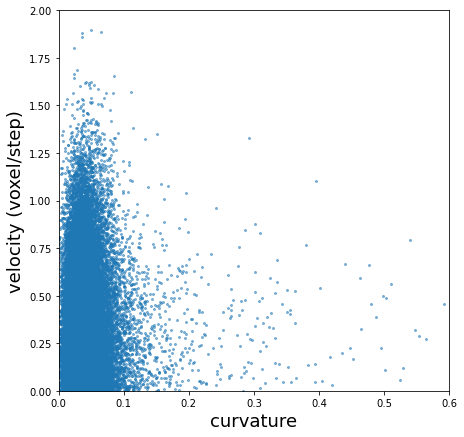

<Figure size 432x288 with 0 Axes>

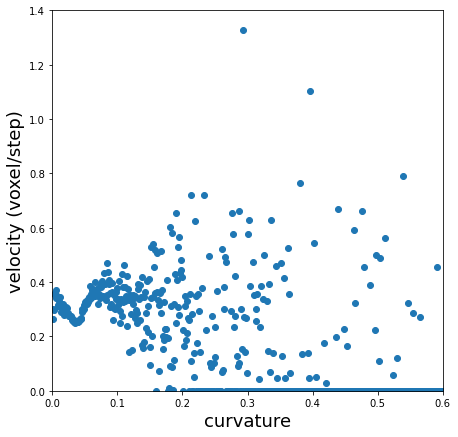

In [19]:
    # All in 1 figrue
    velocity_1Dlist = []
    curvature_1Dlist = []
    curvature_1Dlist_remove_0step = []
    velocity_1Dlist_remove_0step = []
    for i in range(len(GB_list_velocity_list)): 
        velocity_1Dlist.extend(GB_list_velocity_list[i])
        curvature_1Dlist.extend(GB_list_curvature_list[i])
        if i > 0: 
            curvature_1Dlist_remove_0step.extend(GB_list_curvature_list[i])
            velocity_1Dlist_remove_0step.extend(GB_list_velocity_list[i])
    figure_name_all = f"figures/3D_velocity_curvature_{case_name}_5d.png"
    plt.figure()
    fig = plt.figure(figsize=(7, 7))
    plt.scatter(curvature_1Dlist_remove_0step, velocity_1Dlist_remove_0step,s=4,alpha=0.5)
    plt.xlabel("curvature", fontsize=18)
    plt.ylabel("velocity (voxel/step)", fontsize=18)
    plt.xlim([0,0.6])
    plt.ylim([0,2.0])
    plt.savefig(figure_name_all, dpi=400,bbox_inches='tight')
    
    # plot velocity VS averaged curvature
    bin_interval = 0.001
    bin_number = int(0.6/bin_interval)
    curvature_coordinate = np.arange(0,0.6,bin_interval)+bin_interval/2

    curvature_bin = np.zeros(bin_number)
    velocity_bin = np.zeros(bin_number)
    for index in range(len(curvature_1Dlist_remove_0step)):
        if curvature_1Dlist_remove_0step[index]>0.6: continue
        curvature_bin[int(curvature_1Dlist_remove_0step[index]//bin_interval)] += 1
        velocity_bin[int(curvature_1Dlist_remove_0step[index]//bin_interval)] += velocity_1Dlist_remove_0step[index]
    for i in range(bin_number): 
        if curvature_bin[i]>0: velocity_bin[i] = velocity_bin[i]/curvature_bin[i]
    # plot
    figure_name_all_bin = f"figures/3D_velocity_curvature_{case_name}_5d_afterBin.png"
    plt.figure()
    fig = plt.figure(figsize=(7, 7))
    # plt.scatter(curvature_coordinate, velocity_bin,s=4,alpha=0.5)
    plt.plot(curvature_coordinate, velocity_bin,'o', linewidth=2)
    plt.xlabel("curvature", fontsize=18)
    plt.ylabel("velocity (voxel/step)", fontsize=18)
    plt.xlim([0,0.6])
    plt.ylim([0,1.4])
    plt.savefig(figure_name_all_bin, dpi=400,bbox_inches='tight')


In [23]:
    # Plot relationship for each time steps
    for time_step in range(len(GB_list_velocity_list)):
        figure_name = f"figures/3D_velocity_curvature_step{time_step}.png"
        plt.figure()
        fig = plt.figure(figsize=(7, 7))
        plt.scatter(GB_list_curvature_list[time_step], GB_list_velocity_list[time_step],s=4,alpha=0.5)
        plt.xlabel("curvature", fontsize=18)
        plt.ylabel("velocity (voxel/step)", fontsize=18)
        plt.xlim([0,0.6])
        plt.ylim([0,2])
        plt.savefig(figure_name, dpi=400,bbox_inches='tight')

## 2D case

In [42]:
if __name__ == '__main__':
    # File name
    data_file_folder = "/blue/michael.tonks/lin.yang/VECTOR_data/"
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_fully/results/"
    # npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_wellEnergy/results/"
    case_name = "20k_bi"
    npy_file_name_aniso = f"p_aveE_fzabBi_fully5d_20k_J1_f1.0_t0.0_refer_1_0_0_seed56689_kt0.66.npy"
    # npy_file_name_aniso = f"p_aveE_20000_Cos_delta0.0_J1_refer_1_0_0_seed56689_kt0.66.npy"
    
    # Initial data
    npy_file_aniso = np.load(npy_file_folder + npy_file_name_aniso)
    npy_file_aniso = npy_file_aniso.astype(int)
    print(f"The {case_name} data size is: {npy_file_aniso.shape}")
    print("READING DATA DONE")
    step_num, size_x, size_y, size_z = npy_file_aniso.shape

The 20k_bi data size is: (201, 2400, 2400, 1)
READING DATA DONE


In [43]:
    step_num=121
    grain_nums = 20000
    GB_infomation_dict_list = []
    curvature_matrix_list = []
    for time_step in tqdm(range(step_num)):
        data_file_name = f"GB_velocity_data/2D_curvature_velocity_data_MI_{case_name}_step{time_step}.npz"
        data_curvature_file_name = f"GB_velocity_data/2D_matrix_curvature_data_MI_{case_name}_step{time_step}.npz"
        if os.path.exists(data_file_folder + data_file_name):
            npz_file = np.load(data_file_folder + data_file_name,allow_pickle=True)
            GB_infomation_dict = npz_file["GB_infomation_dict"]
            GB_infomation_dict_list.append(GB_infomation_dict.item())
        else:
            current_microstructure = npy_file_aniso[time_step]
            # get curvature
            if os.path.exists(data_file_folder + data_curvature_file_name):
                npz_file_curvature = np.load(data_file_folder + data_curvature_file_name)
                curvature_matrix = npz_file_curvature["curvature_matrix"]
                curvature_matrix_list.append(curvature_matrix)
            else:
                cores = 128
                loop_times = 5
                R = np.zeros((size_x,size_y,3))
                smoothing_class = linear2d.linear_class(size_x,size_y,grain_nums,cores,loop_times,current_microstructure[:,:,0],R,verification_system = False)
                smoothing_class.linear_main("curvature")
                C_ln = smoothing_class.get_C()
                curvature_matrix = C_ln[1,:]
                curvature_matrix_list.append(curvature_matrix)
                # save curvature information
                # np.savez(data_file_folder + data_curvature_file_name, curvature_matrix=curvature_matrix)
            print("Finish curvature calculation")
            
            # Get TJ and QJ information first
            TJ_infomation_dict = dict()
            for index, result in np.ndenumerate(current_microstructure):
                i,j,k = index
                ip,im,jp,jm = myInput.periodic_bc(size_x,size_y,i,j)
                if ( ((current_microstructure[ip,j,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[im,j,k]-current_microstructure[i,j,k])!=0) or\
                     ((current_microstructure[i,jp,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[i,jm,k]-current_microstructure[i,j,k])!=0) ):
                    central_site = int(current_microstructure[i,j,k])
                    neighboring_sites_list = np.array([current_microstructure[ip,j,k], current_microstructure[i,jp,k], current_microstructure[im,j,k], current_microstructure[i,jm,k]]).astype(int)
                    neighboring_sites_set = set(neighboring_sites_list) # Get all unique neighboring sites
                    if central_site in neighboring_sites_set: neighboring_sites_set.remove(central_site) # remove central site
                    neighboring_sites_list_unque = list(neighboring_sites_set)
                    # remove the TJs and QJs
                    if len(neighboring_sites_list_unque) > 1: 
                        for m in range(len(neighboring_sites_list_unque)):
                            pair_id = post_processing.get_line(central_site, neighboring_sites_list_unque[m]) # get pair id
                            if pair_id in TJ_infomation_dict:
                                tmp = TJ_infomation_dict[pair_id]
                                tmp.append([i,j,k])
                                TJ_infomation_dict[pair_id] = tmp
                            else: 
                                TJ_infomation_dict[pair_id] = [[i,j,k]]
            print("Finish TJ extraction")
            
            # Get the center of each GB
            GB_infomation_dict = dict()
            TJ_distance_max = 6 # voxels
            for index, result in np.ndenumerate(current_microstructure):
                i,j,k = index
                ip,im,jp,jm = myInput.periodic_bc(size_x,size_y,i,j)
                if ( ((current_microstructure[ip,j,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[im,j,k]-current_microstructure[i,j,k])!=0) or\
                     ((current_microstructure[i,jp,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[i,jm,k]-current_microstructure[i,j,k])!=0) ):
                    central_site = int(current_microstructure[i,j,k])
                    neighboring_sites_list = np.array([current_microstructure[ip,j,k], current_microstructure[i,jp,k], current_microstructure[im,j,k], current_microstructure[i,jm,k]]).astype(int)
                    neighboring_sites_set = set(neighboring_sites_list) # Get all unique neighboring sites
                    if central_site in neighboring_sites_set: neighboring_sites_set.remove(central_site) # remove central site
                    neighboring_sites_list_unque = list(neighboring_sites_set)
                    # remove the TJs and QJs
                    if len(neighboring_sites_list_unque) > 1: continue # only remove TJs and QJs
                    # CONTINUE...    # remove the voxels around TJs and QJs
                    # check the GB voxels is close to TJ or not
                    break_point = 0
                    pair_id = post_processing.get_line(central_site, neighboring_sites_list_unque[0]) # get pair id
                    if central_site<neighboring_sites_list_unque[0]: pair_id_pair = [central_site, neighboring_sites_list_unque[0]]
                    else: pair_id_pair = [neighboring_sites_list_unque[0], central_site]
                    if pair_id in GB_infomation_dict:
                        GB_infomation_dict[pair_id][5] += 1 # GB area
                    else:
                        GB_infomation = np.array([0,0,0,0,0.0,1,pair_id_pair[0],pair_id_pair[1]]) # GBnum-curvature,i,j,k,curvature,GBnum,gid0,gid1
                        GB_infomation_dict[pair_id] = GB_infomation
                    if pair_id in TJ_infomation_dict:
                        for TJ_site in TJ_infomation_dict[pair_id]:
                            TJ_distance = np.linalg.norm(index-np.array(TJ_site))
                            if TJ_distance < TJ_distance_max: 
                                break_point = 1
                                break
                    if break_point == 1: continue
                    # calculate or extract misorientation
                    # if pair_id in GB_infomation_dict:
                    GB_infomation_dict[pair_id][0] += 1
                    GB_infomation_dict[pair_id][1:5] += np.array([i,j,k,curvature_matrix[i,j]])
                    
            # get the correct location for each GB
            small_GB_list = []
            for key in GB_infomation_dict: 
                if GB_infomation_dict[key][0] == 0: 
                    small_GB_list.append(key) # remove the small GB with 0 voxels after remove voxels close to TJs
            for s_index in range(len(small_GB_list)): GB_infomation_dict.pop(small_GB_list[s_index])
            for key in GB_infomation_dict: 
                GB_infomation_dict[key][1:5]=GB_infomation_dict[key][1:5]/GB_infomation_dict[key][0]
            print(f"Current GBs len at {time_step} steps: {len(GB_infomation_dict)}")
            # save information
            np.savez(data_file_folder + data_file_name, GB_infomation_dict=GB_infomation_dict)
            GB_infomation_dict_list.append(GB_infomation_dict)

  0%|          | 0/121 [00:00<?, ?it/s]

the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
the processor [0, 10] start...
the processor [0, 11] start...
the processor [0, 12] start...
the processor [0, 13] start...
the processor [0, 14] start...
the processor [0, 15] start...
the processor [1, 0] start...
the processor [1, 1] start...
the processor [1, 2] start...
the processor [1, 3] start...
the processor [1, 4] start...
the processor [1, 5] start...
the processor [1, 6] start...
the processor [1, 7] start...
the processor [1, 8] start...
the processor [1, 9] start...
process[0, 2] read 0 times and max qsize 0
my core time is 14.076934
the processor [1, 10] start...
process[0, 1] read 0 times and max qsize 0
my core time is 14.991847
res_back start...
my res time is 0.024681
res

  1%|          | 1/121 [02:51<5:42:10, 171.08s/it]

Current GBs len at 0 steps: 19418
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
the processor [0, 10] start...
the processor [0, 11] start...
the processor [0, 12] start...
the processor [0, 13] start...
the processor [0, 14] start...
the processor [0, 15] start...
the processor [1, 0] start...
the processor [1, 1] start...
the processor [1, 2] start...
the processor [1, 3] start...
the processor [1, 4] start...
process[0, 1] read 0 times and max qsize 0
my core time is 10.106269
the processor [1, 5] start...
process[0, 0] read 0 times and max qsize 0
my core time is 11.229453
res_back start...
my res time is 0.027715
res_back start...
my res time is 0.004789
process[0, 2] read 0 times and max qsize 0
my core time is 10.415877
the proce

  2%|▏         | 2/121 [05:28<5:23:08, 162.93s/it]

Current GBs len at 1 steps: 14059
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
the processor [0, 10] start...
the processor [0, 11] start...
the processor [0, 12] start...
the processor [0, 13] start...
the processor [0, 14] start...
process[0, 1] read 0 times and max qsize 0
my core time is 7.44515
the processor [0, 15] start...
process[0, 0] read 0 times and max qsize 0res_back start...
my res time is 0.019285

my core time is 8.416482
the processor [1, 0] start...
res_back start...
my res time is 0.006189
process[0, 2] read 0 times and max qsize 0
my core time is 7.950574
the processor [1, 1] start...
res_back start...
my res time is 0.005964
the processor [1, 2] start...
the processor [1, 3] start...
the processor [1, 4] start...
t

  2%|▏         | 3/121 [07:59<5:09:30, 157.38s/it]

Current GBs len at 2 steps: 11185
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
the processor [0, 10] start...
the processor [0, 11] start...
the processor [0, 12] start...
process[0, 0] read 0 times and max qsize 0
my core time is 6.851531
process[0, 1] read 0 times and max qsize 0
my core time is 6.442776
the processor [0, 13] start...
res_back start...
my res time is 0.034487
res_back start...
my res time is 0.00631
the processor [0, 14] start...
process[0, 2] read 0 times and max qsize 0
my core time is 6.774691
the processor [0, 15] start...
res_back start...
my res time is 0.004424
the processor [1, 0] start...
the processor [1, 1] start...
the processor [1, 2] start...
process[0, 11] read 0 times and max qsize 0
my core time is 3

  3%|▎         | 4/121 [10:27<4:59:42, 153.70s/it]

Current GBs len at 3 steps: 8958
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
the processor [0, 10] start...
process[0, 0] read 0 times and max qsize 0
my core time is 5.651616
res_back start...
my res time is 0.02427
process[0, 1] read 0 times and max qsize 0
my core time is 5.44262
the processor [0, 11] start...
res_back start...
my res time is 0.004542
the processor [0, 12] start...
process[0, 2] read 0 times and max qsize 0
my core time is 5.759113
the processor [0, 13] start...
res_back start...
my res time is 0.004837
the processor [0, 14] start...
the processor [0, 15] start...
the processor [1, 0] start...
process[0, 11] read 0 times and max qsize 0
my core time is 2.913563
the processor [1, 1] start...
res_back start...
my res

  4%|▍         | 5/121 [12:52<4:51:18, 150.67s/it]

Current GBs len at 4 steps: 7402
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 0] read 0 times and max qsize 0
my core time is 4.643862
the processor [0, 9] start...
res_back start...
my res time is 0.024508
process[0, 1] read 0 times and max qsize 0
my core time is 4.85896
the processor [0, 10] start...
res_back start...
my res time is 0.00507
the processor [0, 11] start...
process[0, 2] read 0 times and max qsize 0
my core time is 4.964014
res_back start...
my res time is 0.004557
the processor [0, 12] start...
the processor [0, 13] start...
the processor [0, 14] start...
the processor [0, 15] start...
process[0, 11] read 0 times and max qsize 0
my core time is 2.556842
the processor [1, 0] start...
res_back start...
my res time is 0.005481
the processo

  5%|▍         | 6/121 [15:18<4:45:58, 149.20s/it]

Current GBs len at 5 steps: 6242
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
the processor [0, 5] start...
the processor [0, 6] start...
process[0, 0] read 0 times and max qsize 0
my core time is 4.275565
the processor [0, 7] start...
res_back start...
my res time is 0.024651
process[0, 1] read 0 times and max qsize 0
my core time is 4.40584
the processor [0, 8] start...
res_back start...
my res time is 0.005481
the processor [0, 9] start...
process[0, 2] read 0 times and max qsize 0
my core time is 4.785022
res_back start...
my res time is 0.004852
the processor [0, 10] start...
the processor [0, 11] start...
the processor [0, 12] start...
the processor [0, 13] start...
the processor [0, 14] start...
process[0, 3] read 0 times and max qsize 0
my core time is 7.213858
process[0, 4] read 0 times and max qsize 0
my core time is 6.881612
res_back start...
my res time is 0.004623
proce

  6%|▌         | 7/121 [17:47<4:43:03, 148.98s/it]

Current GBs len at 6 steps: 5291
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 0] read 0 times and max qsize 0
my core time is 3.807347
res_back start...
my res time is 0.023993
process[0, 1] read 0 times and max qsize 0
my core time is 3.877555
the processor [0, 8] start...
res_back start...
my res time is 0.004965
the processor [0, 9] start...
process[0, 2] read 0 times and max qsize 0
my core time is 4.531784
the processor [0, 10] start...
res_back start...
my res time is 0.006146
the processor [0, 11] start...
the processor [0, 12] start...
the processor [0, 13] start...
the processor [0, 14] start...
process[0, 4] read 0 times and max qsize 0
my core time is 6.151204
process[0, 3] read 0 times and max qsize 0
my core time is 6.781064
process[0, 11] read 0 times and max qsize 0
my

  7%|▋         | 8/121 [20:13<4:39:03, 148.17s/it]

Current GBs len at 7 steps: 4621
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
the processor [0, 5] start...
the processor [0, 6] start...
process[0, 0] read 0 times and max qsize 0
my core time is 3.465452
the processor [0, 7] start...
process[0, 1] read 0 times and max qsize 0
my core time is 3.367591
res_back start...
my res time is 0.023036
res_back start...
my res time is 0.006209
the processor [0, 8] start...
the processor [0, 9] start...
process[0, 2] read 0 times and max qsize 0
my core time is 4.237917
the processor [0, 10] start...
res_back start...
my res time is 0.005938
the processor [0, 11] start...
the processor [0, 12] start...
the processor [0, 13] start...
the processor [0, 14] start...
process[0, 3] read 0 times and max qsize 0
my core time is 6.281489
process[0, 4] read 0 times and max qsize 0
my core time is 5.866603
process[0, 11] read 0 times and max qsize 0
my

  7%|▋         | 9/121 [22:36<4:33:40, 146.61s/it]

Current GBs len at 8 steps: 4091
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
the processor [0, 5] start...
process[0, 0] read 0 times and max qsize 0
my core time is 3.246013
the processor [0, 6] start...
process[0, 1] read 0 times and max qsize 0
my core time is 2.847345
res_back start...
my res time is 0.020526
res_back start...
my res time is 0.004954
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
the processor [0, 10] start...
process[0, 2] read 0 times and max qsize 0
my core time is 4.370915
res_back start...
my res time is 0.005682
the processor [0, 11] start...
the processor [0, 12] start...
the processor [0, 13] start...
the processor [0, 14] start...
process[0, 3] read 0 times and max qsize 0
my core time is 5.875311
process[0, 11] read 0 times and max qsize 0
my core time is 1.726474
res_back start...
my res time is 0.005192
pro

  8%|▊         | 10/121 [24:56<4:27:14, 144.45s/it]

Current GBs len at 9 steps: 3693
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
the processor [0, 5] start...
process[0, 0] read 0 times and max qsize 0
my core time is 3.035986
the processor [0, 6] start...
process[0, 1] read 0 times and max qsize 0
my core time is 2.680454
res_back start...
my res time is 0.022883
res_back start...
my res time is 0.004151
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
process[0, 2] read 0 times and max qsize 0
my core time is 4.119466
the processor [0, 10] start...
res_back start...
my res time is 0.004093
the processor [0, 11] start...
the processor [0, 12] start...
the processor [0, 13] start...
process[0, 11] read 0 times and max qsize 0
my core time is 1.499165
the processor [0, 14] start...
res_back start...
my res time is 0.005437
process[0, 4] read 0 times and max qsize 0
my core time is 5.608412
pro

  9%|▉         | 11/121 [27:15<4:21:57, 142.88s/it]

Current GBs len at 10 steps: 3370
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
the processor [0, 5] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.887051
process[0, 1] read 0 times and max qsize 0
my core time is 2.523891
the processor [0, 6] start...
res_back start...
my res time is 0.036714
res_back start...
my res time is 0.004882
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
process[0, 2] read 0 times and max qsize 0
my core time is 3.901798
res_back start...
my res time is 0.006236
the processor [0, 10] start...
the processor [0, 11] start...
the processor [0, 12] start...
the processor [0, 13] start...
process[0, 11] read 0 times and max qsize 0
my core time is 1.456008
the processor [0, 14] start...
process[0, 3] read 0 times and max qsize 0
my core time is 6.019665
process[0, 4] read 0 times and max qsize 0
m

 10%|▉         | 12/121 [29:38<4:19:14, 142.70s/it]

Current GBs len at 11 steps: 3032
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.705208
the processor [0, 5] start...
process[0, 1] read 0 times and max qsize 0
my core time is 2.166939
res_back start...
my res time is 0.022435
res_back start...
my res time is 0.004591
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 2] read 0 times and max qsize 0
my core time is 3.573808
the processor [0, 9] start...
res_back start...
my res time is 0.005836
the processor [0, 10] start...
the processor [0, 11] start...
the processor [0, 12] start...
the processor [0, 13] start...
process[0, 11] read 0 times and max qsize 0
my core time is 1.262651
process[0, 3] read 0 times and max qsize 0
my core time is 5.660182
process[0, 4] read 0 times and max qsize 0
my core time is 5.367615
the pro

 11%|█         | 13/121 [31:57<4:15:12, 141.78s/it]

Current GBs len at 12 steps: 2802
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.986257
process[0, 0] read 0 times and max qsize 0
my core time is 2.59934
the processor [0, 5] start...
res_back start...
my res time is 0.032909
res_back start...
my res time is 0.005062
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 2] read 0 times and max qsize 0
my core time is 3.439098
the processor [0, 9] start...
res_back start...
my res time is 0.004424
the processor [0, 10] start...
the processor [0, 11] start...
the processor [0, 12] start...
the processor [0, 13] start...
process[0, 11] read 0 times and max qsize 0
my core time is 1.169683
process[0, 3] read 0 times and max qsize 0
my core time is 5.590583
process[0, 8] read 0 times and max qsize 0
my core time is 2.920012
res_back

 12%|█▏        | 14/121 [34:19<4:12:50, 141.78s/it]

Current GBs len at 13 steps: 2574
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.499516
process[0, 1] read 0 times and max qsize 0
my core time is 1.966827
the processor [0, 5] start...
res_back start...
my res time is 0.034093
res_back start...
my res time is 0.004808
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 2] read 0 times and max qsize 0
my core time is 3.389058
res_back start...
the processor [0, 9] start...
my res time is 0.305123
the processor [0, 10] start...
the processor [0, 11] start...
the processor [0, 12] start...
the processor [0, 13] start...
process[0, 11] read 0 times and max qsize 0
my core time is 1.093795
process[0, 8] read 0 times and max qsize 0
my core time is 2.897919
process[0, 3] read 0 times and max qsize 0res_back start...
my res time is 

 12%|█▏        | 15/121 [36:40<4:09:57, 141.48s/it]

Current GBs len at 14 steps: 2370
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
the processor [0, 4] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.752973
process[0, 0] read 0 times and max qsize 0
my core time is 2.462873
the processor [0, 5] start...
res_back start...
my res time is 0.270364
res_back start...
my res time is 0.004886
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 2] read 0 times and max qsize 0
my core time is 3.206799
the processor [0, 8] start...
res_back start...
my res time is 0.006119
the processor [0, 9] start...
the processor [0, 10] start...
the processor [0, 11] start...
the processor [0, 12] start...
process[0, 11] read 0 times and max qsize 0
my core time is 1.040152
the processor [0, 13] start...
process[0, 3] read 0 times and max qsize 0
my core time is 5.499588
process[0, 5] read 0 times and max qsize 0
my core time is 4.544672
process

 13%|█▎        | 16/121 [39:00<4:06:38, 140.94s/it]

Current GBs len at 15 steps: 2198
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.641194
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.38763
res_back start...
my res time is 0.028501
res_back start...
my res time is 0.004969
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 2] read 0 times and max qsize 0
my core time is 3.098377
res_back start...
my res time is 0.00425
the processor [0, 8] start...
the processor [0, 9] start...
the processor [0, 10] start...
the processor [0, 11] start...
process[0, 3] read 0 times and max qsize 0
my core time is 5.012558
process[0, 5] read 0 times and max qsize 0res_back start...
my res time is 0.004432

my core time is 4.056358
the processor [0, 12] start...
process[0, 4] read 0 times and max qsize 0
my core time is 4.821885

 14%|█▍        | 17/121 [41:23<4:05:46, 141.79s/it]

Current GBs len at 16 steps: 2065
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.616798
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.40813
res_back start...
my res time is 0.021153
the processor [0, 5] start...
res_back start...
my res time is 0.004553
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 2] read 0 times and max qsize 0
my core time is 2.905596
the processor [0, 8] start...
res_back start...
my res time is 0.006025
the processor [0, 9] start...
the processor [0, 10] start...
the processor [0, 11] start...
process[0, 6] read 0 times and max qsize 0
my core time is 3.234153
the processor [0, 12] start...
process[0, 3] read 0 times and max qsize 0
my core time is 4.942293
process[0, 5] read 0 times and max qsize 0
my core time is 3.876024
res_back start...
my res time is 0.00443

 15%|█▍        | 18/121 [43:43<4:02:09, 141.06s/it]

Current GBs len at 17 steps: 1917
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.557347
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.293974
res_back start...
my res time is 0.02236
the processor [0, 5] start...
res_back start...
my res time is 0.262396
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 2] read 0 times and max qsize 0
my core time is 2.815059
res_back start...
my res time is 0.005393
the processor [0, 8] start...
the processor [0, 9] start...
the processor [0, 10] start...
the processor [0, 11] start...
process[0, 3] read 0 times and max qsize 0
my core time is 4.731561
process[0, 6] read 0 times and max qsize 0
res_back start...
my res time is 0.005267
my core time is 3.143967
the processor [0, 12] start...
process[0, 5] read 0 times and max qsize 0
my core time is 4.06775

 16%|█▌        | 19/121 [46:04<3:59:57, 141.15s/it]

Current GBs len at 18 steps: 1799
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.534468
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.378697
res_back start...
my res time is 0.023105
the processor [0, 5] start...
res_back start...
my res time is 0.006057
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 2] read 0 times and max qsize 0
my core time is 2.856175
res_back start...
my res time is 0.301943
the processor [0, 8] start...
the processor [0, 9] start...
the processor [0, 10] start...
the processor [0, 11] start...
process[0, 6] read 0 times and max qsize 0
my core time is 3.019454
process[0, 3] read 0 times and max qsize 0
my core time is 4.648105
the processor [0, 12] start...
process[0, 4] read 0 times and max qsize 0
my core time is 4.485236
process[0, 5] read 0 times and max qsiz

 17%|█▋        | 20/121 [48:25<3:57:32, 141.11s/it]

Current GBs len at 19 steps: 1733
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.479732
the processor [0, 4] start...
res_back start...
my res time is 0.021303
process[0, 0] read 0 times and max qsize 0
my core time is 2.411923
the processor [0, 5] start...
res_back start...
my res time is 0.005279
the processor [0, 6] start...
process[0, 2] read 0 times and max qsize 0
my core time is 2.523043
the processor [0, 7] start...
res_back start...
my res time is 0.003993
the processor [0, 8] start...
the processor [0, 9] start...
the processor [0, 10] start...
process[0, 3] read 0 times and max qsize 0
my core time is 4.131107
the processor [0, 11] start...
res_back start...
my res time is 0.004023
process[0, 8] read 0 times and max qsize 0
my core time is 1.949788
process[0, 6] read 0 times and max qsize 0
my core time is 3.034166
the processor [0, 12] start.

 17%|█▋        | 21/121 [50:42<3:53:16, 139.97s/it]

Current GBs len at 20 steps: 1657
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.434593
the processor [0, 4] start...
res_back start...
my res time is 0.021152
process[0, 0] read 0 times and max qsize 0
my core time is 2.382684
the processor [0, 5] start...
res_back start...
my res time is 0.005735
the processor [0, 6] start...
process[0, 2] read 0 times and max qsize 0
my core time is 2.3826
the processor [0, 7] start...
res_back start...
my res time is 0.005652
the processor [0, 8] start...
the processor [0, 9] start...
the processor [0, 10] start...
process[0, 3] read 0 times and max qsize 0
my core time is 4.115265
the processor [0, 11] start...
process[0, 8] read 0 times and max qsize 0
res_back start...
my res time is 0.005616
res_back start...
my core time is 1.873774
process[0, 6] read 0 times and max qsize 0
my core time is 3.06765
the processor

 18%|█▊        | 22/121 [53:00<3:49:35, 139.15s/it]

Current GBs len at 21 steps: 1596
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.504239
process[0, 0] read 0 times and max qsize 0
my core time is 2.406586
the processor [0, 4] start...
res_back start...
my res time is 0.259954
res_back start...
my res time is 0.004334
the processor [0, 5] start...
process[0, 2] read 0 times and max qsize 0
my core time is 2.159842
res_back start...
my res time is 0.004395
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.974175
res_back start...
my res time is 0.004383
the processor [0, 10] start...
process[0, 6] read 0 times and max qsize 0
my core time is 3.051555
process[0, 8] read 0 times and max qsize 0
my core time is 1.774438
process[0, 4] read 0 times and max qsize 0
my core time is 

 19%|█▉        | 23/121 [55:25<3:50:30, 141.13s/it]

Current GBs len at 22 steps: 1520
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.479376
the processor [0, 4] start...
res_back start...
my res time is 0.020784
process[0, 0] read 0 times and max qsize 0
my core time is 2.419836
the processor [0, 5] start...
res_back start...
my res time is 0.005635
process[0, 2] read 0 times and max qsize 0
my core time is 2.100748
the processor [0, 6] start...
res_back start...
my res time is 0.004018
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
the processor [0, 10] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.942687
the processor [0, 11] start...
process[0, 8] read 0 times and max qsize 0
my core time is 1.686174
res_back start...
my res time is 0.005044
res_back start...
my res time is 0.004506
process[0, 6] read 0 times and max qsize 0
my core tim

 20%|█▉        | 24/121 [57:44<3:47:08, 140.50s/it]

Current GBs len at 23 steps: 1447
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.447419
the processor [0, 4] start...
res_back start...
my res time is 0.020805
process[0, 0] read 0 times and max qsize 0
my core time is 2.442347
the processor [0, 5] start...
res_back start...
my res time is 0.004512
process[0, 2] read 0 times and max qsize 0
my core time is 2.056647
the processor [0, 6] start...
res_back start...
my res time is 0.006059
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
the processor [0, 10] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.935197
the processor [0, 11] start...
process[0, 8] read 0 times and max qsize 0
my core time is 1.615393
res_back start...
my res time is 0.004078
res_back start...
my res time is 0.004788
process[0, 6] read 0 times and max qsize 0
my core tim

 21%|██        | 25/121 [1:00:03<3:44:02, 140.02s/it]

Current GBs len at 24 steps: 1388
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.424104
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0res_back start...
my res time is 0.021709

my core time is 2.430297
the processor [0, 5] start...
res_back start...
my res time is 0.004437
process[0, 2] read 0 times and max qsize 0
my core time is 2.011605
the processor [0, 6] start...
res_back start...
my res time is 0.005138
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
the processor [0, 10] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.77348
res_back start...
my res time is 0.003998
the processor [0, 11] start...
process[0, 8] read 0 times and max qsize 0
my core time is 1.627057
process[0, 6] read 0 times and max qsize 0
res_back start...
my res time is 0.005906
res_back sta

 21%|██▏       | 26/121 [1:02:24<3:42:11, 140.33s/it]

Current GBs len at 25 steps: 1335
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.416732
the processor [0, 4] start...
res_back start...
my res time is 0.022114
process[0, 0] read 0 times and max qsize 0
my core time is 2.540761
the processor [0, 5] start...
process[0, 2] read 0 times and max qsize 0
my core time is 1.780888
res_back start...
my res time is 0.00551
res_back start...
my res time is 0.004501
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.718184
the processor [0, 10] start...
res_back start...
my res time is 0.004839
process[0, 8] read 0 times and max qsize 0
my core time is 1.625345
the processor [0, 11] start...
process[0, 5] read 0 times and max qsize 0
my core time is 3.40426
process[0, 6] read 0 times and

 22%|██▏       | 27/121 [1:04:44<3:39:30, 140.11s/it]

Current GBs len at 26 steps: 1277
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.451608
the processor [0, 4] start...
res_back start...
my res time is 0.020902
process[0, 0] read 0 times and max qsize 0
my core time is 2.560101
the processor [0, 5] start...
res_back start...
my res time is 0.00458
process[0, 2] read 0 times and max qsize 0
my core time is 1.876858
the processor [0, 6] start...
res_back start...
my res time is 0.004424
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.676613
the processor [0, 10] start...
res_back start...
my res time is 0.005232
the processor [0, 11] start...
process[0, 8] read 0 times and max qsize 0
my core time is 1.6011
process[0, 6] read 0 times and max qsize 0
my core time is 2.763016
process[0, 5] read 0 times and 

 23%|██▎       | 28/121 [1:07:06<3:38:14, 140.80s/it]

Current GBs len at 27 steps: 1234
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.420067
the processor [0, 4] start...
res_back start...
my res time is 0.020547
process[0, 0] read 0 times and max qsize 0
my core time is 2.614547
the processor [0, 5] start...
process[0, 2] read 0 times and max qsize 0
my core time is 1.74556
res_back start...
my res time is 0.004893
res_back start...
my res time is 0.00467
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.679406
the processor [0, 10] start...
res_back start...
my res time is 0.004655
process[0, 4] read 0 times and max qsize 0
my core time is 3.789266
process[0, 6] read 0 times and max qsize 0
my core time is 2.647672
process[0, 8] read 0 times and max qsize 0
my core time is 1.

 24%|██▍       | 29/121 [1:09:29<3:36:39, 141.30s/it]

Current GBs len at 28 steps: 1204
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.431429
the processor [0, 4] start...
res_back start...
my res time is 0.023119
process[0, 0] read 0 times and max qsize 0
my core time is 2.566234
the processor [0, 5] start...
process[0, 2] read 0 times and max qsize 0
my core time is 1.708083
res_back start...
my res time is 0.004465
res_back start...
my res time is 0.004095
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.678632
the processor [0, 10] start...
process[0, 4] read 0 times and max qsize 0
my core time is 3.573577
process[0, 6] read 0 times and max qsize 0
my core time is 2.395219
res_back start...
my res time is 0.004411
process[0, 8] read 0 times and max qsize 0
my core time is 

 25%|██▍       | 30/121 [1:11:52<3:35:04, 141.81s/it]

Current GBs len at 29 steps: 1164
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.360083
the processor [0, 4] start...
res_back start...
my res time is 0.023447
process[0, 0] read 0 times and max qsize 0
my core time is 2.636947
the processor [0, 5] start...
process[0, 2] read 0 times and max qsize 0
my core time is 1.737394
res_back start...
my res time is 0.005904
res_back start...
the processor [0, 6] start...
my res time is 0.292719
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.690264
the processor [0, 10] start...
process[0, 4] read 0 times and max qsize 0
my core time is 3.342563
process[0, 6] read 0 times and max qsize 0

my core time is 2.322434res_back start...
my res time is 0.006091
res_back start...
my res time is 0.005642
res_back start...

 26%|██▌       | 31/121 [1:14:13<3:32:28, 141.65s/it]

Current GBs len at 30 steps: 1118
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.319856
res_back start...
my res time is 0.024449
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.661268
process[0, 2] read 0 times and max qsize 0
my core time is 1.760366
the processor [0, 5] start...
res_back start...
my res time is 0.005704
res_back start...
my res time is 0.006369
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 4] read 0 times and max qsize 0
my core time is 3.106825
the processor [0, 9] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.728414
res_back start...
my res time is 0.006369
res_back start...
my res time is 0.004941
process[0, 6] read 0 times and max qsize 0
my core time is 2.220258
the processor [0, 10] start...
process[0, 8] rea

 26%|██▋       | 32/121 [1:16:37<3:31:18, 142.45s/it]

Current GBs len at 31 steps: 1055
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.397686
the processor [0, 4] start...
res_back start...
my res time is 0.021511
process[0, 0] read 0 times and max qsize 0
my core time is 2.536238
the processor [0, 5] start...
process[0, 2] read 0 times and max qsize 0
my core time is 1.745302
res_back start...
my res time is 0.005685
res_back start...
my res time is 0.005072
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.428395
process[0, 4] read 0 times and max qsize 0
my core time is 3.018069res_back start...
my res time is 0.309012

process[0, 6] read 0 times and max qsize 0
my core time is 2.091922
the processor [0, 10] start...
res_back start...
my res time is 0.005365
res_back start...

 27%|██▋       | 33/121 [1:19:00<3:28:52, 142.42s/it]

Current GBs len at 32 steps: 1020
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.380877
the processor [0, 4] start...
res_back start...
my res time is 0.022394
process[0, 0] read 0 times and max qsize 0
my core time is 2.659156
the processor [0, 5] start...
process[0, 2] read 0 times and max qsize 0
my core time is 1.695217
res_back start...
my res time is 0.005025
res_back start...
my res time is 0.006368
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.990765
process[0, 3] read 0 times and max qsize 0
my core time is 3.538332
process[0, 6] read 0 times and max qsize 0
my core time is 1.971511
the processor [0, 10] start...
res_back start...
my res time is 0.004949
res_back start...
my res time is 0.005014
res_back start...

 28%|██▊       | 34/121 [1:21:24<3:27:18, 142.97s/it]

Current GBs len at 33 steps: 980
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.419005
the processor [0, 4] start...
res_back start...
my res time is 0.021764
process[0, 0] read 0 times and max qsize 0
my core time is 2.509215
process[0, 2] read 0 times and max qsize 0
my core time is 1.602602
the processor [0, 5] start...
res_back start...
my res time is 0.0047
res_back start...
my res time is 0.0044
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.473074
process[0, 4] read 0 times and max qsize 0
my core time is 2.965737
process[0, 6] read 0 times and max qsize 0
my core time is 2.107036
the processor [0, 10] start...
process[0, 8] read 0 times and max qsize 0
my core time is 1.308145
res_back start...
my res time is 0.006

 29%|██▉       | 35/121 [1:23:47<3:24:59, 143.02s/it]

Current GBs len at 34 steps: 958
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.428467
the processor [0, 4] start...
res_back start...
my res time is 0.022396
process[0, 0] read 0 times and max qsize 0
my core time is 2.57081
process[0, 2] read 0 times and max qsize 0
my core time is 1.612747
the processor [0, 5] start...
res_back start...
my res time is 0.004857
res_back start...
my res time is 0.004701
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.886785
process[0, 3] read 0 times and max qsize 0
my core time is 3.524207
process[0, 6] read 0 times and max qsize 0
my core time is 2.023151
the processor [0, 10] start...
res_back start...
my res time is 0.2615
res_back start...
my res time is 0.005302
res_back start...
my 

 30%|██▉       | 36/121 [1:26:12<3:23:26, 143.61s/it]

Current GBs len at 35 steps: 927
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.364969
the processor [0, 4] start...
res_back start...
my res time is 0.021085
process[0, 0] read 0 times and max qsize 0
my core time is 2.474825
process[0, 2] read 0 times and max qsize 0
my core time is 1.63042
the processor [0, 5] start...
res_back start...
my res time is 0.005147
res_back start...
my res time is 0.004865
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
the processor [0, 9] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.426552
process[0, 4] read 0 times and max qsize 0
my core time is 2.946838
process[0, 6] read 0 times and max qsize 0
my core time is 1.85062
res_back start...
the processor [0, 10] start...
my res time is 0.341151
res_back start...
my res time is 0.005122
res_back start...
my

 31%|███       | 37/121 [1:28:36<3:21:00, 143.58s/it]

Current GBs len at 36 steps: 909
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.383941
res_back start...
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.482063
my res time is 0.242906
process[0, 2] read 0 times and max qsize 0
my core time is 1.640082
the processor [0, 5] start...
res_back start...
my res time is 0.006384
res_back start...
my res time is 0.005477
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.245195
res_back start...
my res time is 0.00518
process[0, 4] read 0 times and max qsize 0
my core time is 2.961276
the processor [0, 9] start...
process[0, 6] read 0 times and max qsize 0
my core time is 1.93488
res_back start...
my res time is 0.005944
res_back start...
my res time is 0.005027
the proce

 31%|███▏      | 38/121 [1:31:01<3:19:16, 144.05s/it]

Current GBs len at 37 steps: 889
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.302015
the processor [0, 4] start...
res_back start...
my res time is 0.250083
process[0, 0] read 0 times and max qsize 0
my core time is 2.498151
process[0, 2] read 0 times and max qsize 0
my core time is 1.441642
the processor [0, 5] start...
res_back start...
my res time is 0.005145
res_back start...
my res time is 0.004345
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.364021
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.991895
process[0, 6] read 0 times and max qsize 0
my core time is 1.831151
res_back start...
my res time is 0.004749
res_back start...
the processor [0, 10] start...
my res time is 0.255219
res_back start...


 32%|███▏      | 39/121 [1:33:24<3:16:32, 143.81s/it]

Current GBs len at 38 steps: 867
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.354584
the processor [0, 4] start...
res_back start...
my res time is 0.021315
process[0, 0] read 0 times and max qsize 0
my core time is 2.530658
process[0, 2] read 0 times and max qsize 0
my core time is 1.584369
the processor [0, 5] start...
res_back start...
my res time is 0.005223
res_back start...
my res time is 0.004912
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.306573
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.852697
process[0, 6] read 0 times and max qsize 0
my core time is 1.722593
res_back start...
my res time is 0.006056
res_back start...
my res time is 0.004579
res_back start...
my res time is 0.025761
the pro

 33%|███▎      | 40/121 [1:35:47<3:13:54, 143.64s/it]

Current GBs len at 39 steps: 848
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.329208
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.508695
res_back start...
my res time is 0.023442
process[0, 2] read 0 times and max qsize 0
my core time is 1.459115
the processor [0, 5] start...
res_back start...
my res time is 0.004411
res_back start...
my res time is 0.004259
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.171288
the processor [0, 9] start...
process[0, 6] read 0 times and max qsize 0
my core time is 1.738987
process[0, 4] read 0 times and max qsize 0
my core time is 2.998151
res_back start...
my res time is 0.005134
res_back start...
my res time is 0.004831
the processor [0, 10] start...
res_back start...


 34%|███▍      | 41/121 [1:38:10<3:11:18, 143.48s/it]

Current GBs len at 40 steps: 827
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.279646
the processor [0, 4] start...
res_back start...
my res time is 0.021302
process[0, 0] read 0 times and max qsize 0
my core time is 2.470786
process[0, 2] read 0 times and max qsize 0
my core time is 1.417286
the processor [0, 5] start...
res_back start...
my res time is 0.004429
res_back start...
my res time is 0.004459
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.183251
the processor [0, 9] start...
process[0, 6] read 0 times and max qsize 0
my core time is 1.736402
res_back start...
my res time is 0.004922
res_back start...
my res time is 0.024726
process[0, 4] read 0 times and max qsize 0
my core time is 3.006561
the processor [0, 10] start...
res_back start...


 35%|███▍      | 42/121 [1:40:34<3:08:51, 143.43s/it]

Current GBs len at 41 steps: 809
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.280335
the processor [0, 4] start...
res_back start...
my res time is 0.0253
process[0, 2] read 0 times and max qsize 0
my core time is 1.391854
process[0, 0] read 0 times and max qsize 0
my core time is 2.494239
the processor [0, 5] start...
res_back start...
my res time is 0.006101
res_back start...
my res time is 0.005094
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.163402
process[0, 4] read 0 times and max qsize 0
my core time is 2.822957
process[0, 6] read 0 times and max qsize 0
my core time is 1.642202
the processor [0, 9] start...
res_back start...
my res time is 0.006125
res_back start...
my res time is 0.005315
res_back start...
my res time is 0.005992
the proce

 36%|███▌      | 43/121 [1:42:55<3:05:41, 142.84s/it]

Current GBs len at 42 steps: 787
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.330705
the processor [0, 4] start...
process[0, 2] read 0 times and max qsize 0res_back start...
my res time is 0.02288

my core time is 1.371911
process[0, 0] read 0 times and max qsize 0
my core time is 2.491262
the processor [0, 5] start...
res_back start...
my res time is 0.004622
res_back start...
my res time is 0.003795
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.15571
the processor [0, 9] start...
process[0, 6] read 0 times and max qsize 0
my core time is 1.699886
process[0, 4] read 0 times and max qsize 0
my core time is 2.885438
res_back start...
my res time is 0.005913
res_back start...
my res time is 0.067147
the processor [0, 10] start...
res_back start...
my

 36%|███▋      | 44/121 [1:45:19<3:03:47, 143.22s/it]

Current GBs len at 43 steps: 778
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.378401
the processor [0, 4] start...
process[0, 2] read 0 times and max qsize 0
res_back start...
my res time is 0.023288
res_back start...
my core time is 1.277893
process[0, 0] read 0 times and max qsize 0
my core time is 2.395
the processor [0, 5] start...
my res time is 0.006018
res_back start...
my res time is 0.004922
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.073106
process[0, 6] read 0 times and max qsize 0
my core time is 1.51349
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.943933
res_back start...
my res time is 0.005931
res_back start...
my res time is 0.005064
res_back start...
my res time is 0.031556
the process

 37%|███▋      | 45/121 [1:47:43<3:01:35, 143.37s/it]

Current GBs len at 44 steps: 764
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.392802
the processor [0, 4] start...
process[0, 2] read 0 times and max qsize 0
my core time is 1.228813
process[0, 0] read 0 times and max qsize 0
my core time is 2.422726
res_back start...
my res time is 0.023692
res_back start...
my res time is 0.004668
the processor [0, 5] start...
res_back start...
my res time is 0.250393
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.07074
process[0, 6] read 0 times and max qsize 0
my core time is 1.570725
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.93925
res_back start...
my res time is 0.00469
res_back start...
my res time is 0.004879
res_back start...
the processor [0, 10] start...
my 

 38%|███▊      | 46/121 [1:50:08<2:59:58, 143.98s/it]

Current GBs len at 45 steps: 753
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.377735
the processor [0, 4] start...
process[0, 2] read 0 times and max qsize 0
my core time is 1.261948
res_back start...
my res time is 0.023231
process[0, 0] read 0 times and max qsize 0
my core time is 2.487986
the processor [0, 5] start...
res_back start...
my res time is 0.006363
res_back start...
my res time is 0.005128
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.200501
process[0, 6] read 0 times and max qsize 0
my core time is 1.572498
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.979788
res_back start...
my res time is 0.006385
res_back start...
my res time is 0.005064
the processor [0, 10] start...
res_back start...


 39%|███▉      | 47/121 [1:52:32<2:57:23, 143.83s/it]

Current GBs len at 46 steps: 738
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.32335
process[0, 2] read 0 times and max qsize 0
my core time is 1.061575
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.403687
res_back start...
my res time is 0.038021
res_back start...
my res time is 0.005119
res_back start...
my res time is 0.005143
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.06755
process[0, 6] read 0 times and max qsize 0
my core time is 1.451189
the processor [0, 9] start...
res_back start...
my res time is 0.004632
res_back start...
my res time is 0.004476
process[0, 4] read 0 times and max qsize 0
my core time is 3.252367
the processor [0, 10] start...
res_back start...
my

 40%|███▉      | 48/121 [1:54:56<2:54:55, 143.77s/it]

Current GBs len at 47 steps: 735
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.367664
process[0, 2] read 0 times and max qsize 0
my core time is 0.9247
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.345952
res_back start...
my res time is 0.036225
res_back start...
my res time is 0.004989
res_back start...
my res time is 0.049877the processor [0, 5] start...

the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 6] read 0 times and max qsize 0
my core time is 1.341272
process[0, 3] read 0 times and max qsize 0
my core time is 3.063762
the processor [0, 9] start...
res_back start...
my res time is 0.006506
res_back start...
my res time is 0.005261
process[0, 4] read 0 times and max qsize 0
my core time is 3.170929
the processor [0, 10] start...
res_back start...
my

 40%|████      | 49/121 [1:57:17<2:51:48, 143.17s/it]

Current GBs len at 48 steps: 709
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.266821
process[0, 2] read 0 times and max qsize 0
my core time is 0.988401
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.248647
res_back start...
my res time is 0.035358
res_back start...
my res time is 0.00489
res_back start...
my res time is 0.004921
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 6] read 0 times and max qsize 0
my core time is 1.171219
process[0, 3] read 0 times and max qsize 0res_back start...
my res time is 0.069335

my core time is 3.134166
the processor [0, 9] start...
res_back start...
my res time is 0.005309
process[0, 4] read 0 times and max qsize 0
my core time is 3.193484
the processor [0, 10] start...
res_back start...
m

 41%|████▏     | 50/121 [1:59:41<2:49:29, 143.23s/it]

Current GBs len at 49 steps: 702
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.269321
process[0, 2] read 0 times and max qsize 0
my core time is 0.943189
process[0, 0] read 0 times and max qsize 0
my core time is 2.184095
the processor [0, 4] start...
res_back start...
my res time is 0.035892
res_back start...
my res time is 0.005884
res_back start...
my res time is 0.005688
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 1.120542
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
res_back start...
my res time is 0.005735
my core time is 3.152731
the processor [0, 9] start...
res_back start...
my res time is 0.00628
process[0, 4] read 0 times and max qsize 0
my core time is 3.213361
the processor [0, 10] start...
res_back start...
m

 42%|████▏     | 51/121 [2:02:02<2:46:33, 142.76s/it]

Current GBs len at 50 steps: 675
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.305691
process[0, 2] read 0 times and max qsize 0
my core time is 0.879622
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.245619
res_back start...
my res time is 0.267155
res_back start...
my res time is 0.004528
res_back start...
my res time is 0.004867
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 1.066903
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
res_back start...
my res time is 0.006095
my core time is 3.144247
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 3.108328
res_back start...
my res time is 0.006307
the processor [0, 10] start...
res_back start...


 43%|████▎     | 52/121 [2:04:27<2:44:45, 143.26s/it]

Current GBs len at 51 steps: 654
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.331526
process[0, 2] read 0 times and max qsize 0
my core time is 0.871758
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.148378
res_back start...
my res time is 0.033547
res_back start...
my res time is 0.005225
res_back start...
the processor [0, 5] start...
my res time is 0.021102
the processor [0, 6] start...
the processor [0, 7] start...
the processor [0, 8] start...
process[0, 6] read 0 times and max qsize 0
my core time is 1.110464
res_back start...
my res time is 0.004377
the processor [0, 9] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.277012
res_back start...
my res time is 0.005782
process[0, 4] read 0 times and max qsize 0
my core time is 3.234424
the processor [0, 10] start...
res_back start...


 44%|████▍     | 53/121 [2:06:51<2:42:34, 143.45s/it]

Current GBs len at 52 steps: 635
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.32757
process[0, 2] read 0 times and max qsize 0
my core time is 0.874927
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.212905
res_back start...
my res time is 0.047175
res_back start...
my res time is 0.005228
the processor [0, 5] start...
res_back start...
my res time is 0.005084
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.939371
the processor [0, 8] start...
res_back start...
my res time is 0.005791
process[0, 3] read 0 times and max qsize 0
my core time is 3.157743
the processor [0, 9] start...
res_back start...
my res time is 0.004396
process[0, 4] read 0 times and max qsize 0
my core time is 3.050686
the processor [0, 10] start...
res_back start...
m

 45%|████▍     | 54/121 [2:09:14<2:40:16, 143.53s/it]

Current GBs len at 53 steps: 625
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.347121
process[0, 2] read 0 times and max qsize 0
my core time is 0.905749
process[0, 0] read 0 times and max qsize 0the processor [0, 4] start...

my core time is 2.189327
res_back start...
my res time is 0.031916
res_back start...
my res time is 0.005085
res_back start...
my res time is 0.033185
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.960332
the processor [0, 8] start...
res_back start...
my res time is 0.004584
process[0, 3] read 0 times and max qsize 0
my core time is 3.226892
the processor [0, 9] start...
res_back start...
my res time is 0.005872
process[0, 4] read 0 times and max qsize 0
my core time is 3.010212
the processor [0, 10] start...
res_back start...


 45%|████▌     | 55/121 [2:11:37<2:37:43, 143.39s/it]

Current GBs len at 54 steps: 607
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.339869
process[0, 2] read 0 times and max qsize 0
my core time is 0.915605
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.290276
res_back start...
my res time is 0.036517
res_back start...
my res time is 0.004629
res_back start...
my res time is 0.053171the processor [0, 5] start...

the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.898345
the processor [0, 8] start...
res_back start...
my res time is 0.006538
process[0, 3] read 0 times and max qsize 0
my core time is 3.22183
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.968905
res_back start...
my res time is 0.004487
the processor [0, 10] start...
res_back start...
m

 46%|████▋     | 56/121 [2:14:03<2:35:52, 143.88s/it]

Current GBs len at 55 steps: 591
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.319109
process[0, 2] read 0 times and max qsize 0
my core time is 0.914109
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.219961
res_back start...
my res time is 0.03294
res_back start...
my res time is 0.005197
the processor [0, 5] start...
res_back start...
my res time is 0.252908
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.87754
the processor [0, 8] start...
res_back start...
my res time is 0.00478
process[0, 3] read 0 times and max qsize 0
my core time is 3.193813
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.851868
res_back start...
my res time is 0.00495
the processor [0, 10] start...
res_back start...
my r

 47%|████▋     | 57/121 [2:16:24<2:32:49, 143.27s/it]

Current GBs len at 56 steps: 590
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.296698
process[0, 2] read 0 times and max qsize 0
my core time is 0.877896
process[0, 0] read 0 times and max qsize 0
my core time is 2.259972
the processor [0, 4] start...
res_back start...
my res time is 0.034445
res_back start...
my res time is 0.005345
res_back start...
my res time is 0.004441
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.898008
the processor [0, 8] start...
res_back start...
my res time is 0.00448
process[0, 3] read 0 times and max qsize 0
my core time is 3.179627
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.930068
res_back start...
my res time is 0.00577
res_back start...
my res time is 0.005729
the proce

 48%|████▊     | 58/121 [2:18:51<2:31:32, 144.32s/it]

Current GBs len at 57 steps: 578
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.355752
process[0, 2] read 0 times and max qsize 0
my core time is 0.891414
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.220145
res_back start...
my res time is 0.045192
res_back start...
my res time is 0.005211
the processor [0, 5] start...
res_back start...
my res time is 0.244285
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.896146
the processor [0, 8] start...
res_back start...
my res time is 0.006118
process[0, 3] read 0 times and max qsize 0
my core time is 3.206998
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.865717
res_back start...
my res time is 0.0047
res_back start...
my res time is 0.023332
the proce

 49%|████▉     | 59/121 [2:21:15<2:29:07, 144.32s/it]

Current GBs len at 58 steps: 573
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.358342
process[0, 2] read 0 times and max qsize 0
my core time is 0.893763
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.166962
res_back start...
my res time is 0.034469
res_back start...
my res time is 0.004892
res_back start...
my res time is 0.049953
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.892103
the processor [0, 8] start...
res_back start...
my res time is 0.004403
process[0, 3] read 0 times and max qsize 0
my core time is 3.135157
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.866007
res_back start...
my res time is 0.006114
res_back start...
my res time is 0.006457
the pro

 50%|████▉     | 60/121 [2:23:41<2:27:06, 144.70s/it]

Current GBs len at 59 steps: 563
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.342518
process[0, 2] read 0 times and max qsize 0
my core time is 0.88039
res_back start...
my res time is 0.022368
process[0, 0] read 0 times and max qsize 0
my core time is 2.346186
the processor [0, 4] start...
res_back start...
my res time is 0.006377
res_back start...
my res time is 0.005334
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.895549
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.099833
res_back start...
my res time is 0.005065
res_back start...
my res time is 0.006237
process[0, 4] read 0 times and max qsize 0
my core time is 2.748322
the processor [0, 9] start...
res_back start...
my res time is 0.004865
the proc

 50%|█████     | 61/121 [2:26:07<2:25:09, 145.15s/it]

Current GBs len at 60 steps: 561
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.324548
process[0, 2] read 0 times and max qsize 0
my core time is 0.884511
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.354768
res_back start...
my res time is 0.032631
res_back start...
my res time is 0.004931
the processor [0, 5] start...
res_back start...
my res time is 0.261134
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.893608
the processor [0, 8] start...
res_back start...
my res time is 0.004444
process[0, 3] read 0 times and max qsize 0
my core time is 3.178777
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.78856
res_back start...
my res time is 0.006043
res_back start...
my res time is 0.00529
the proce

 51%|█████     | 62/121 [2:28:33<2:22:49, 145.24s/it]

Current GBs len at 61 steps: 546
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.327447
process[0, 2] read 0 times and max qsize 0
my core time is 0.922314
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.221626
res_back start...
my res time is 0.031535
res_back start...
my res time is 0.005203
res_back start...
my res time is 0.004332
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.929436
the processor [0, 8] start...
res_back start...
my res time is 0.004352
process[0, 3] read 0 times and max qsize 0
my core time is 3.175485
process[0, 4] read 0 times and max qsize 0
my core time is 2.771245
the processor [0, 9] start...
res_back start...
my res time is 0.006171
res_back start...
my res time is 0.005092
process

 52%|█████▏    | 63/121 [2:30:59<2:20:50, 145.69s/it]

Current GBs len at 62 steps: 537
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.320211
process[0, 2] read 0 times and max qsize 0
my core time is 0.908991
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.220174
res_back start...
my res time is 0.036567
res_back start...
my res time is 0.00506
res_back start...
my res time is 0.005015
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.900729
the processor [0, 8] start...
res_back start...
my res time is 0.006392
process[0, 3] read 0 times and max qsize 0
my core time is 3.105796
process[0, 4] read 0 times and max qsize 0
my core time is 2.746539
the processor [0, 9] start...
res_back start...
my res time is 0.004488
res_back start...
my res time is 0.004337
process[

 53%|█████▎    | 64/121 [2:33:26<2:18:47, 146.10s/it]

Current GBs len at 63 steps: 527
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.332572
process[0, 2] read 0 times and max qsize 0
my core time is 0.867951
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.210565
res_back start...
my res time is 0.032399
res_back start...
my res time is 0.005164
res_back start...
my res time is 0.288261
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.875035
the processor [0, 8] start...
res_back start...
my res time is 0.004658
process[0, 3] read 0 times and max qsize 0
my core time is 3.091051
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.807023
res_back start...
my res time is 0.005148
res_back start...
the processor [0, 10] start...


 54%|█████▎    | 65/121 [2:35:55<2:16:58, 146.75s/it]

Current GBs len at 64 steps: 519
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.382524
process[0, 2] read 0 times and max qsize 0
my core time is 0.884192
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.195757
res_back start...
my res time is 0.032598
res_back start...
my res time is 0.005049
res_back start...
the processor [0, 5] start...
my res time is 0.04665
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.907208
the processor [0, 8] start...
res_back start...
my res time is 0.004721
process[0, 3] read 0 times and max qsize 0
my core time is 3.025226
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.755287
res_back start...
my res time is 0.005626
res_back start...
my res time is 0.006053
the proc

 55%|█████▍    | 66/121 [2:38:26<2:15:43, 148.07s/it]

Current GBs len at 65 steps: 511
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.388599
process[0, 2] read 0 times and max qsize 0
my core time is 0.883025
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.248861
res_back start...
my res time is 0.035941
res_back start...
my res time is 0.005054
the processor [0, 5] start...
res_back start...
my res time is 0.264144
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.945732
the processor [0, 8] start...
res_back start...
my res time is 0.006008
process[0, 3] read 0 times and max qsize 0
my core time is 3.182809
process[0, 4] read 0 times and max qsize 0
my core time is 2.684519
the processor [0, 9] start...
res_back start...
my res time is 0.004628
res_back start...
my res time is 0.004409
process

 55%|█████▌    | 67/121 [2:40:55<2:13:37, 148.48s/it]

Current GBs len at 66 steps: 511
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.344187
process[0, 2] read 0 times and max qsize 0
my core time is 0.87148
process[0, 0] read 0 times and max qsize 0
my core time is 2.186285
the processor [0, 4] start...
res_back start...
my res time is 0.03329
res_back start...
my res time is 0.005049
res_back start...
my res time is 0.004405
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.955603
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.974264
res_back start...
my res time is 0.004565
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.875722
res_back start...
my res time is 0.006435
process[0, 5] read 0 times and max qsize 0res_back 

 56%|█████▌    | 68/121 [2:43:28<2:12:20, 149.83s/it]

Current GBs len at 67 steps: 494
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.347673
process[0, 2] read 0 times and max qsize 0
my core time is 0.877876
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.246541
res_back start...
my res time is 0.031629
res_back start...
my res time is 0.004951
the processor [0, 5] start...
res_back start...
my res time is 0.005041
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.969216
the processor [0, 8] start...
res_back start...
my res time is 0.004677
process[0, 3] read 0 times and max qsize 0
my core time is 3.062155
process[0, 4] read 0 times and max qsize 0
my core time is 2.686375
the processor [0, 9] start...
res_back start...
my res time is 0.006116
res_back start...
my res time is 0.005128
the pro

 57%|█████▋    | 69/121 [2:45:59<2:10:09, 150.18s/it]

Current GBs len at 68 steps: 491
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.356461
process[0, 2] read 0 times and max qsize 0
my core time is 0.849225
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.239195
res_back start...
my res time is 0.032013
res_back start...
my res time is 0.005393
res_back start...
my res time is 0.022998
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.952217
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0res_back start...
my res time is 0.004562
res_back start...

my core time is 3.089011
process[0, 4] read 0 times and max qsize 0
my core time is 2.772043
the processor [0, 9] start...
my res time is 0.005847
res_back start...
my res time is 0.005098
process

 58%|█████▊    | 70/121 [2:48:33<2:08:31, 151.20s/it]

Current GBs len at 69 steps: 490
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.384067
process[0, 2] read 0 times and max qsize 0
my core time is 0.883546
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.225384
res_back start...
my res time is 0.03527
res_back start...
my res time is 0.005108
the processor [0, 5] start...
res_back start...
my res time is 0.004959
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.980883
the processor [0, 8] start...
res_back start...
my res time is 0.00425
process[0, 4] read 0 times and max qsize 0
my core time is 2.594342
process[0, 3] read 0 times and max qsize 0
my core time is 3.153774
the processor [0, 9] start...
res_back start...
my res time is 0.004818
res_back start...
my res time is 0.005191
process[0

 59%|█████▊    | 71/121 [2:51:03<2:05:48, 150.97s/it]

Current GBs len at 70 steps: 484
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.379806
process[0, 2] read 0 times and max qsize 0
my core time is 0.882112
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.284062
res_back start...
my res time is 0.040321
res_back start...
my res time is 0.005003
res_back start...
my res time is 0.028727
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.979929
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 3.004475
res_back start...
my res time is 0.006501
res_back start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.758411
the processor [0, 9] start...
my res time is 0.240771
res_back start...
my res time is 0.004395
process

 60%|█████▉    | 72/121 [2:53:36<2:03:44, 151.53s/it]

Current GBs len at 71 steps: 472
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.352055
process[0, 2] read 0 times and max qsize 0
my core time is 0.909662
the processor [0, 4] start...
process[0, 0] read 0 times and max qsize 0
my core time is 2.214832
res_back start...
my res time is 0.038594
res_back start...
my res time is 0.004979
the processor [0, 5] start...
res_back start...
my res time is 0.243743
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.98628
the processor [0, 8] start...
res_back start...
my res time is 0.004908
process[0, 3] read 0 times and max qsize 0
my core time is 3.006026
process[0, 4] read 0 times and max qsize 0
my core time is 2.650688
the processor [0, 9] start...
res_back start...
my res time is 0.006439
res_back start...
my res time is 0.005471
process[

 60%|██████    | 73/121 [2:56:07<2:01:02, 151.30s/it]

Current GBs len at 72 steps: 475
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.354358
process[0, 2] read 0 times and max qsize 0
my core time is 0.878921
process[0, 0] read 0 times and max qsize 0
my core time is 2.055288
the processor [0, 4] start...
res_back start...
my res time is 0.033471
res_back start...
my res time is 0.004933
the processor [0, 5] start...
res_back start...
my res time is 0.242584
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.939412
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.900774
res_back start...
my res time is 0.004911
res_back start...
my res time is 0.023429
process[0, 4] read 0 times and max qsize 0
my core time is 2.707875
the processor [0, 9] start...
res_back start...
my res time is 0.004632
process

 61%|██████    | 74/121 [2:58:41<1:59:17, 152.28s/it]

Current GBs len at 73 steps: 474
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.353792
process[0, 2] read 0 times and max qsize 0
my core time is 0.835067
process[0, 0] read 0 times and max qsize 0
my core time is 2.12443
the processor [0, 4] start...
res_back start...
my res time is 0.354436
res_back start...
my res time is 0.004906
res_back start...
my res time is 0.004741
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.963418
process[0, 3] read 0 times and max qsize 0
my core time is 2.958606
the processor [0, 8] start...
res_back start...
my res time is 0.005132
res_back start...
my res time is 0.004314
process[0, 4] read 0 times and max qsize 0
my core time is 2.740408
the processor [0, 9] start...
process[0, 5] read 0 times and max qsize 0
my core

 62%|██████▏   | 75/121 [3:01:16<1:57:20, 153.06s/it]

Current GBs len at 74 steps: 465
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.358447
process[0, 2] read 0 times and max qsize 0
my core time is 0.839957
process[0, 0] read 0 times and max qsize 0
my core time is 2.033465
the processor [0, 4] start...
res_back start...
my res time is 0.033829
res_back start...
my res time is 0.004951
the processor [0, 5] start...
res_back start...
my res time is 0.250949
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.973059
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.902719
res_back start...
my res time is 0.004428
process[0, 4] read 0 times and max qsize 0
my core time is 2.727822
the processor [0, 9] start...
res_back start...
my res time is 0.272229
res_back start...
my res time is 0.005053
process

 63%|██████▎   | 76/121 [3:03:47<1:54:17, 152.39s/it]

Current GBs len at 75 steps: 464
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 2] read 0 times and max qsize 0
my core time is 0.834489
process[0, 1] read 0 times and max qsize 0
my core time is 1.376979
process[0, 0] read 0 times and max qsize 0
my core time is 1.928131
the processor [0, 4] start...
res_back start...
my res time is 0.032715
res_back start...
my res time is 0.005028
the processor [0, 5] start...
res_back start...
my res time is 0.290834
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.968517
the processor [0, 8] start...
res_back start...
my res time is 0.004718
process[0, 3] read 0 times and max qsize 0
my core time is 2.930835
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.789704
res_back start...
my res time is 0.005937
res_back start...
my res time is 0.005779
process

 64%|██████▎   | 77/121 [3:06:15<1:50:48, 151.11s/it]

Current GBs len at 76 steps: 462
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.813508
process[0, 1] read 0 times and max qsize 0
my core time is 1.369281
process[0, 2] read 0 times and max qsize 0
my core time is 0.844129
the processor [0, 4] start...
res_back start...
my res time is 0.037241
res_back start...
my res time is 0.005209
res_back start...
my res time is 0.005084
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.942961
process[0, 3] read 0 times and max qsize 0
my core time is 2.754227
the processor [0, 8] start...
res_back start...
my res time is 0.004743
res_back start...
my res time is 0.004461
process[0, 4] read 0 times and max qsize 0
my core time is 2.819742
the processor [0, 9] start...
res_back start...
my res time is 0.006557
process

 64%|██████▍   | 78/121 [3:08:44<1:47:41, 150.27s/it]

Current GBs len at 77 steps: 457
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
the processor [0, 3] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.736947
process[0, 1] read 0 times and max qsize 0
my core time is 1.352384
process[0, 2] read 0 times and max qsize 0
my core time is 0.831243
the processor [0, 4] start...
res_back start...
my res time is 0.340732
res_back start...
my res time is 0.004912
res_back start...
my res time is 0.004848
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.941409
process[0, 3] read 0 times and max qsize 0
my core time is 2.817893
the processor [0, 8] start...
res_back start...
my res time is 0.005118
res_back start...
my res time is 0.004866
process[0, 4] read 0 times and max qsize 0
my core time is 2.694554
the processor [0, 9] start...
res_back start...
my res time is 0.006289
process

 65%|██████▌   | 79/121 [3:11:14<1:45:17, 150.41s/it]

Current GBs len at 78 steps: 448
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.610356
the processor [0, 3] start...
res_back start...
my res time is 0.023971
process[0, 1] read 0 times and max qsize 0
my core time is 1.369419
process[0, 2] read 0 times and max qsize 0
my core time is 0.835665
the processor [0, 4] start...
res_back start...
my res time is 0.005827
res_back start...
my res time is 0.004961
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.949092
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.866
res_back start...
my res time is 0.005192
the processor [0, 9] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.794448
res_back start...
my res time is 0.006307
res_back start...
process[0, 5] read 0 times and max

 66%|██████▌   | 80/121 [3:13:46<1:43:03, 150.81s/it]

Current GBs len at 79 steps: 445
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.590262
the processor [0, 3] start...
process[0, 2] read 0 times and max qsize 0res_back start...
my res time is 0.022747

my core time is 0.813255
process[0, 1] read 0 times and max qsize 0
my core time is 1.373624
the processor [0, 4] start...
res_back start...
my res time is 0.004827
res_back start...
my res time is 0.004015
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.96636
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.932051
res_back start...
my res time is 0.004696
process[0, 4] read 0 times and max qsize 0
my core time is 2.733595
the processor [0, 9] start...
res_back start...
my res time is 0.251719
res_back start...
my res time is 0.005288
process[

 67%|██████▋   | 81/121 [3:16:16<1:40:22, 150.55s/it]

Current GBs len at 80 steps: 439
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.506359
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.353407
res_back start...
my res time is 0.023102
process[0, 2] read 0 times and max qsize 0
my core time is 0.864329
the processor [0, 4] start...
res_back start...
my res time is 0.254854
res_back start...
my res time is 0.004959
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.949102
process[0, 3] read 0 times and max qsize 0
my core time is 2.822847
the processor [0, 8] start...
res_back start...
my res time is 0.00616
res_back start...
my res time is 0.005485
process[0, 4] read 0 times and max qsize 0
my core time is 2.697485
the processor [0, 9] start...
res_back start...
my res time is 0.004317
process[

 68%|██████▊   | 82/121 [3:18:46<1:37:44, 150.38s/it]

Current GBs len at 81 steps: 435
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.555619
the processor [0, 3] start...
res_back start...
my res time is 0.022241
process[0, 2] read 0 times and max qsize 0
my core time is 0.857875
process[0, 1] read 0 times and max qsize 0
my core time is 1.371567
the processor [0, 4] start...
res_back start...
my res time is 0.00547
res_back start...
my res time is 0.005077
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.938008
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.805778
res_back start...
my res time is 0.006084
process[0, 4] read 0 times and max qsize 0
my core time is 2.615071
the processor [0, 9] start...
res_back start...
my res time is 0.006151
res_back start...
my res time is 0.005003
the proc

 69%|██████▊   | 83/121 [3:21:18<1:35:30, 150.81s/it]

Current GBs len at 82 steps: 433
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.50247
the processor [0, 3] start...
res_back start...
my res time is 0.02211
process[0, 1] read 0 times and max qsize 0
my core time is 1.371029
process[0, 2] read 0 times and max qsize 0
my core time is 0.851593
the processor [0, 4] start...
res_back start...
my res time is 0.00629
res_back start...
my res time is 0.005105
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 6] read 0 times and max qsize 0
my core time is 0.919022
the processor [0, 8] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.856396
res_back start...
my res time is 0.006344
res_back start...
my res time is 0.00487
process[0, 4] read 0 times and max qsize 0
my core time is 2.790652
the processor [0, 9] start...
res_back start...
my res time is 0.005603
process[0, 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




my core time is 1.413619
the processor [5, 8] start...
res_back start...
my res time is 0.004501
the processor [5, 9] start...
process[5, 6] read 0 times and max qsize 0
my core time is 2.209123
the processor [5, 10] start...
res_back start...
my res time is 0.005121
the processor [5, 11] start...
the processor [5, 12] start...
process[5, 9] read 0 times and max qsize 0
my core time is 1.812457
the processor [5, 13] start...
res_back start...
my res time is 0.005047
the processor [5, 14] start...
process[5, 10] read 0 times and max qsize 0
my core time is 2.222809
process[5, 7] read 0 times and max qsize 0
my core time is 4.023049
process[5, 8] read 0 times and max qsize 0res_back start...
my res time is 0.006552
res_back start...

my core time is 3.517912
process[5, 11] read 0 times and max qsize 0
my core time is 1.85188
the processor [5, 15] start...
my res time is 0.006095
res_back start...
my res time is 0.005158
res_back start...
my res time is 0.005892
process[5, 13] read 0 tim

 80%|████████  | 97/121 [3:57:32<1:02:23, 155.98s/it]

Current GBs len at 96 steps: 381
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.254867
the processor [0, 3] start...
res_back start...
my res time is 0.025124
process[0, 1] read 0 times and max qsize 0
my core time is 1.318092
process[0, 2] read 0 times and max qsize 0
my core time is 0.868196
the processor [0, 4] start...
res_back start...
my res time is 0.005555
res_back start...
my res time is 0.005395
the processor [0, 5] start...
the processor [0, 6] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.159519
the processor [0, 7] start...
res_back start...
my res time is 0.00493
process[0, 6] read 0 times and max qsize 0
my core time is 0.924242
the processor [0, 8] start...
process[0, 4] read 0 times and max qsize 0
res_back start...
my res time is 0.004907
my core time is 2.402688
process[0, 7] read 0 times and max qsize 0
my core time is 1.060334
the processo

 81%|████████  | 98/121 [4:00:06<59:29, 155.21s/it]  

Current GBs len at 97 steps: 375
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.173942
res_back start...
my res time is 0.085206
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.343657
process[0, 2] read 0 times and max qsize 0
my core time is 0.881912
the processor [0, 4] start...
res_back start...
my res time is 0.005115
res_back start...
my res time is 0.004911
the processor [0, 5] start...
the processor [0, 6] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.261341
the processor [0, 7] start...
res_back start...
my res time is 0.004483
process[0, 6] read 0 times and max qsize 0
my core time is 0.941533
the processor [0, 8] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.369472
res_back start...
my res time is 0.004462
res_back start...
my res time is 0.006401
process[0, 7] read 0 times and max qs

 82%|████████▏ | 99/121 [4:02:40<56:46, 154.83s/it]

Current GBs len at 98 steps: 374
the processor [0, 0] start...
the processor [0, 1] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.034881
the processor [0, 2] start...
res_back start...
my res time is 0.021559
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.303528
process[0, 2] read 0 times and max qsize 0
my core time is 0.836256
the processor [0, 4] start...
res_back start...
my res time is 0.004717
res_back start...
my res time is 0.004455
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.390735
process[0, 6] read 0 times and max qsize 0
my core time is 0.949215
the processor [0, 8] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.302427
res_back start...
my res time is 0.005062
res_back start...
my res time is 0.004157
res_back start...
my res time is 0.003796
process[0, 7] read 0 times and max qs

 83%|████████▎ | 100/121 [4:05:20<54:44, 156.40s/it]

Current GBs len at 99 steps: 370
the processor [0, 0] start...
the processor [0, 1] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.013481
the processor [0, 2] start...
res_back start...
my res time is 0.023128
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.321328
process[0, 2] read 0 times and max qsize 0
my core time is 0.856526
the processor [0, 4] start...
res_back start...
my res time is 0.310339
res_back start...
my res time is 0.005956
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.422945
process[0, 6] read 0 times and max qsize 0res_back start...
my res time is 0.005838

my core time is 0.9489
process[0, 4] read 0 times and max qsize 0
my core time is 2.199338
the processor [0, 8] start...
res_back start...
my res time is 0.007392
res_back start...
my res time is 0.005461
process[0, 7] read 0 times and max qsiz

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



the processor [0, 0] start...
the processor [0, 1] start...
process[0, 0] read 0 times and max qsize 0
my core time is 0.97308
the processor [0, 2] start...
res_back start...
my res time is 0.020137
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.337768
process[0, 2] read 0 times and max qsize 0
my core time is 0.810831
the processor [0, 4] start...
res_back start...
my res time is 0.005883
res_back start...
my res time is 0.005028
the processor [0, 5] start...
the processor [0, 6] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.433756
the processor [0, 7] start...
process[0, 4] read 0 times and max qsize 0
res_back start...
my res time is 0.005296
my core time is 2.170057
process[0, 6] read 0 times and max qsize 0
my core time is 0.966156
the processor [0, 8] start...
res_back start...
my res time is 0.005165
res_back start...
my res time is 0.004956
process[0, 7] read 0 times and max qsize 0
my core time is 0.915004
the

 84%|████████▍ | 102/121 [4:10:38<49:56, 157.73s/it]

Current GBs len at 101 steps: 367
the processor [0, 0] start...
the processor [0, 1] start...
process[0, 0] read 0 times and max qsize 0
my core time is 0.994087
the processor [0, 2] start...
res_back start...
my res time is 0.02229
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.288195
process[0, 2] read 0 times and max qsize 0
my core time is 0.846848
the processor [0, 4] start...
res_back start...
my res time is 0.005183
res_back start...
my res time is 0.004216
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.314155
process[0, 6] read 0 times and max qsize 0res_back start...
my res time is 0.305595

my core time is 0.959683
process[0, 4] read 0 times and max qsize 0
my core time is 2.178286
the processor [0, 8] start...
res_back start...
my res time is 0.004922
res_back start...
my res time is 0.004024
process[0, 7] read 0 times and max qs

 85%|████████▌ | 103/121 [4:13:16<47:17, 157.66s/it]

Current GBs len at 102 steps: 364
the processor [0, 0] start...
the processor [0, 1] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.012742
the processor [0, 2] start...
res_back start...
my res time is 0.021719
process[0, 1] read 0 times and max qsize 0
my core time is 1.306334
the processor [0, 3] start...
process[0, 2] read 0 times and max qsize 0
my core time is 0.804325
res_back start...
my res time is 0.004833
res_back start...
my res time is 0.00472
the processor [0, 4] start...
the processor [0, 5] start...
the processor [0, 6] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.408952
the processor [0, 7] start...
process[0, 4] read 0 times and max qsize 0
my core time is 2.156074
res_back start...
my res time is 0.005558
res_back start...
my res time is 0.004738
process[0, 6] read 0 times and max qsize 0
my core time is 0.956122
the processor [0, 8] start...res_back start...

my res time is 0.27153
process[0, 7] read 0 times and max qsi

 86%|████████▌ | 104/121 [4:15:58<45:02, 158.96s/it]

Current GBs len at 103 steps: 361
the processor [0, 0] start...
the processor [0, 1] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.08663
the processor [0, 2] start...
res_back start...
my res time is 0.019816
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.276921
process[0, 2] read 0 times and max qsize 0
my core time is 0.816544
the processor [0, 4] start...
res_back start...
my res time is 0.004706
res_back start...
my res time is 0.004337
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.432032
process[0, 4] read 0 times and max qsize 0
my core time is 2.027141
process[0, 6] read 0 times and max qsize 0
my core time is 0.979614
the processor [0, 8] start...
res_back start...
my res time is 0.005286
res_back start...
my res time is 0.004374
res_back start...
my res time is 0.005118
process[0, 7] read 0 times and max qs

 87%|████████▋ | 105/121 [4:18:37<42:24, 159.03s/it]

Current GBs len at 104 steps: 359
the processor [0, 0] start...
the processor [0, 1] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.068277
the processor [0, 2] start...
res_back start...
my res time is 0.021982
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.288527
process[0, 2] read 0 times and max qsize 0
my core time is 0.814866
the processor [0, 4] start...
res_back start...
my res time is 0.004556
res_back start...
my res time is 0.004368
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.511253
process[0, 4] read 0 times and max qsize 0
my core time is 2.04231
process[0, 6] read 0 times and max qsize 0
my core time is 0.984718
the processor [0, 8] start...
res_back start...
my res time is 0.004609
res_back start...
my res time is 0.004126
res_back start...
my res time is 0.004528
process[0, 7] read 0 times and max qs

 88%|████████▊ | 106/121 [4:21:19<39:57, 159.86s/it]

Current GBs len at 105 steps: 362
the processor [0, 0] start...
the processor [0, 1] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.117835
the processor [0, 2] start...
res_back start...
my res time is 0.02021
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.336449
process[0, 2] read 0 times and max qsize 0
my core time is 0.826037
the processor [0, 4] start...
res_back start...
my res time is 0.00434
res_back start...
my res time is 0.004341
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.381892
process[0, 4] read 0 times and max qsize 0
my core time is 2.054978
process[0, 6] read 0 times and max qsize 0
my core time is 0.946993
the processor [0, 8] start...
res_back start...
my res time is 0.004808
res_back start...
my res time is 0.004118
res_back start...
my res time is 0.004315
process[0, 7] read 0 times and max qsi

 88%|████████▊ | 107/121 [4:23:58<37:15, 159.69s/it]

Current GBs len at 106 steps: 359
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.144144
res_back start...
my res time is 0.020316
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.311226
process[0, 2] read 0 times and max qsize 0
my core time is 0.836267
the processor [0, 4] start...
res_back start...
my res time is 0.005134
res_back start...
my res time is 0.004753
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.471009
process[0, 6] read 0 times and max qsize 0
my core time is 0.96124
process[0, 4] read 0 times and max qsize 0
my core time is 2.061248
the processor [0, 8] start...
res_back start...
my res time is 0.006092
res_back start...
my res time is 0.005309
res_back start...
my res time is 0.02402
process[0, 7] read 0 times and max qsi

 89%|████████▉ | 108/121 [4:26:42<34:51, 160.91s/it]

Current GBs len at 107 steps: 362
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.121954
res_back start...
my res time is 0.021088
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.334539
process[0, 2] read 0 times and max qsize 0
my core time is 0.844003
the processor [0, 4] start...
res_back start...
my res time is 0.005313
res_back start...
my res time is 0.004943
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.442238
process[0, 4] read 0 times and max qsize 0
my core time is 1.985773
process[0, 6] read 0 times and max qsize 0
my core time is 0.954558
the processor [0, 8] start...
res_back start...
my res time is 0.004683
res_back start...
my res time is 0.004637
res_back start...
process[0, 7] read 0 times and max qsize 0
my core time is 0

 90%|█████████ | 109/121 [4:29:19<31:58, 159.87s/it]

Current GBs len at 108 steps: 362
the processor [0, 0] start...
the processor [0, 1] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.109718
the processor [0, 2] start...
res_back start...
my res time is 0.022828
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.295643
process[0, 2] read 0 times and max qsize 0
my core time is 0.808712
the processor [0, 4] start...
res_back start...
my res time is 0.005488
res_back start...
my res time is 0.005035
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.45589
process[0, 4] read 0 times and max qsize 0
my core time is 1.956372
process[0, 6] read 0 times and max qsize 0
my core time is 0.942332
res_back start...
my res time is 0.005193
res_back start...
my res time is 0.005538
the processor [0, 8] start...
process[0, 7] read 0 times and max qsize 0
my core time is 0.889196
res_back st

 91%|█████████ | 110/121 [4:31:58<29:14, 159.49s/it]

Current GBs len at 109 steps: 355
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.078885
res_back start...
my res time is 0.021093
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.286754
process[0, 2] read 0 times and max qsize 0
my core time is 0.804929
the processor [0, 4] start...
res_back start...
my res time is 0.004556
res_back start...
my res time is 0.00384
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 4] read 0 times and max qsize 0
my core time is 1.871306
process[0, 3] read 0 times and max qsize 0
my core time is 2.51782
process[0, 6] read 0 times and max qsize 0
my core time is 0.936933
the processor [0, 8] start...
res_back start...
my res time is 0.00662
res_back start...
my res time is 0.005606
res_back start...
my res time is 0.006174
process[0, 7] read 0 times and max qsiz

 92%|█████████▏| 111/121 [4:34:36<26:29, 158.92s/it]

Current GBs len at 110 steps: 350
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.123119
res_back start...
my res time is 0.020694
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.305295
process[0, 2] read 0 times and max qsize 0
my core time is 0.803237
the processor [0, 4] start...
res_back start...
my res time is 0.004579
res_back start...
my res time is 0.003793
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 4] read 0 times and max qsize 0
my core time is 1.93483
process[0, 3] read 0 times and max qsize 0
my core time is 2.608455
process[0, 6] read 0 times and max qsize 0
my core time is 0.971041
the processor [0, 8] start...
res_back start...
my res time is 0.006282
res_back start...
my res time is 0.005482
res_back start...
process[0, 7] read 0 times and max qsize 0
my core time is 0.

 93%|█████████▎| 112/121 [4:37:13<23:46, 158.54s/it]

Current GBs len at 111 steps: 349
the processor [0, 0] start...
the processor [0, 1] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.099912
the processor [0, 2] start...
res_back start...
my res time is 0.021275
the processor [0, 3] start...
process[0, 2] read 0 times and max qsize 0
my core time is 0.807918
process[0, 1] read 0 times and max qsize 0
my core time is 1.345504
the processor [0, 4] start...
res_back start...
my res time is 0.005584
res_back start...
my res time is 0.006141
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.465034
process[0, 4] read 0 times and max qsize 0
my core time is 2.032882
process[0, 6] read 0 times and max qsize 0
my core time is 0.936157
the processor [0, 8] start...
res_back start...
my res time is 0.004764
res_back start...
my res time is 0.004507
res_back start...
my res time is 0.004519
process[0, 7] read 0 times and max q

 93%|█████████▎| 113/121 [4:39:53<21:12, 159.04s/it]

Current GBs len at 112 steps: 347
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.145361
the processor [0, 3] start...
res_back start...
my res time is 0.023212
process[0, 1] read 0 times and max qsize 0
my core time is 1.310377
process[0, 2] read 0 times and max qsize 0
my core time is 0.816798
the processor [0, 4] start...
res_back start...
my res time is 0.004683
res_back start...
my res time is 0.003953
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.46419
process[0, 4] read 0 times and max qsize 0
my core time is 1.918623
process[0, 6] read 0 times and max qsize 0
my core time is 0.952572
the processor [0, 8] start...
res_back start...
my res time is 0.004735
res_back start...
my res time is 0.004287
res_back start...
my res time is 0.004243
process[0, 7] read 0 times and max qs

 94%|█████████▍| 114/121 [4:42:33<18:34, 159.26s/it]

Current GBs len at 113 steps: 347
the processor [0, 0] start...
the processor [0, 1] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.04765
the processor [0, 2] start...
res_back start...
my res time is 0.022325
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.303599
process[0, 2] read 0 times and max qsize 0
my core time is 0.806282
the processor [0, 4] start...
res_back start...
my res time is 0.005928
res_back start...
my res time is 0.005207
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.427039
process[0, 4] read 0 times and max qsize 0
my core time is 1.93839
process[0, 6] read 0 times and max qsize 0
my core time is 0.968302
the processor [0, 8] start...
res_back start...
my res time is 0.004884
res_back start...
my res time is 0.004069
res_back start...
my res time is 0.004496
process[0, 7] read 0 times and max qsi

 95%|█████████▌| 115/121 [4:45:13<15:56, 159.47s/it]

Current GBs len at 114 steps: 347
the processor [0, 0] start...
the processor [0, 1] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.083295
the processor [0, 2] start...
res_back start...
my res time is 0.023965
the processor [0, 3] start...
process[0, 2] read 0 times and max qsize 0
my core time is 0.788567process[0, 1] read 0 times and max qsize 0

my core time is 1.318349
the processor [0, 4] start...
res_back start...
my res time is 0.005279
res_back start...
my res time is 0.004885
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.384543
process[0, 4] read 0 times and max qsize 0
my core time is 2.019502
process[0, 6] read 0 times and max qsize 0
my core time is 0.946951
the processor [0, 8] start...
res_back start...
my res time is 0.2454
res_back start...
my res time is 0.005893
res_back start...
my res time is 0.005059
process[0, 7] read 0 times and max qsi

 96%|█████████▌| 116/121 [4:47:55<13:21, 160.23s/it]

Current GBs len at 115 steps: 346
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.057912
res_back start...
my res time is 0.022092
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.293345
process[0, 2] read 0 times and max qsize 0
my core time is 0.790555
the processor [0, 4] start...
res_back start...
my res time is 0.005991
res_back start...
my res time is 0.005234
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.390095
process[0, 4] read 0 times and max qsize 0
my core time is 1.954284
process[0, 6] read 0 times and max qsize 0
my core time is 0.930713
the processor [0, 8] start...
res_back start...
my res time is 0.006145
res_back start...
my res time is 0.005225
res_back start...
my res time is 0.005942
process[0, 7] read 0 times and max q

 97%|█████████▋| 117/121 [4:50:35<10:40, 160.08s/it]

Current GBs len at 116 steps: 341
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.093003
res_back start...
my res time is 0.024323
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.316762
process[0, 2] read 0 times and max qsize 0
my core time is 0.837271
the processor [0, 4] start...
res_back start...
my res time is 0.006398
res_back start...
my res time is 0.005578
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.421632
process[0, 4] read 0 times and max qsize 0
my core time is 1.984056
process[0, 6] read 0 times and max qsize 0
my core time is 0.938091
the processor [0, 8] start...
res_back start...
my res time is 0.004593
res_back start...
my res time is 0.004432
res_back start...
my res time is 0.004435
process[0, 7] read 0 times and max q

 98%|█████████▊| 118/121 [4:53:15<08:00, 160.10s/it]

Current GBs len at 117 steps: 341
Finish curvature calculation
Finish TJ extraction


 98%|█████████▊| 119/121 [4:55:59<05:22, 161.15s/it]

Current GBs len at 118 steps: 339
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.098594
res_back start...
my res time is 0.021253
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.265531
process[0, 2] read 0 times and max qsize 0
my core time is 0.841303
the processor [0, 4] start...
res_back start...
my res time is 0.006136
res_back start...
my res time is 0.004997
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.457327
process[0, 4] read 0 times and max qsize 0
my core time is 2.020815
process[0, 6] read 0 times and max qsize 0
my core time is 0.940883
the processor [0, 8] start...
res_back start...
my res time is 0.005024
res_back start...
my res time is 0.004517
res_back start...
my res time is 0.004918
process[0, 7] read 0 times and max q

 99%|█████████▉| 120/121 [4:58:36<02:39, 159.96s/it]

Current GBs len at 119 steps: 336
the processor [0, 0] start...
the processor [0, 1] start...
the processor [0, 2] start...
process[0, 0] read 0 times and max qsize 0
my core time is 1.045556
res_back start...
my res time is 0.021837
the processor [0, 3] start...
process[0, 1] read 0 times and max qsize 0
my core time is 1.288514
process[0, 2] read 0 times and max qsize 0
my core time is 0.803971
the processor [0, 4] start...
res_back start...
my res time is 0.004051
res_back start...
my res time is 0.004467
the processor [0, 5] start...
the processor [0, 6] start...
the processor [0, 7] start...
process[0, 3] read 0 times and max qsize 0
my core time is 2.403404
process[0, 4] read 0 times and max qsize 0
my core time is 1.992847
process[0, 6] read 0 times and max qsize 0
my core time is 0.932537
the processor [0, 8] start...
res_back start...
my res time is 0.00656
res_back start...
my res time is 0.005583
res_back start...
my res time is 0.006134
process[0, 7] read 0 times and max qs

100%|██████████| 121/121 [5:01:15<00:00, 149.38s/it]

Current GBs len at 120 steps: 336


In [44]:
    time_interval = 2
    GB_list_velocity = np.zeros((step_num,int(grain_nums*(grain_nums+1)/2)))
    GB_list_velocity_list = []
    GB_list_curvature_list = []
    for time_step in range(step_num):
        if time_step+1 >= step_num: continue
        GB_list_velocity_list_tmp = []
        GB_list_curvature_list_tmp = []
        for key in tqdm(GB_infomation_dict_list[time_step]):
            if GB_infomation_dict_list[time_step+1].get(key) is None: continue
            # Calculate velocity
            pair_id_pair = GB_infomation_dict_list[time_step][key][6:8]
            growth_direction1 = (npy_file_aniso[time_step]==pair_id_pair[0])*(npy_file_aniso[time_step+1]==pair_id_pair[1])
            growth_direction2 = (npy_file_aniso[time_step]==pair_id_pair[1])*(npy_file_aniso[time_step+1]==pair_id_pair[0])
            dV = abs(np.sum(growth_direction1)-np.sum(growth_direction2))
            
            # location_difference = GB_infomation_dict_list[time_step+1][key][1:4] - GB_infomation_dict_list[time_step][key][1:4]
            # location_length = np.linalg.norm(location_difference)
            velocity = dV/time_interval/(GB_infomation_dict_list[time_step][key][5]/2)
            GB_list_velocity_list_tmp.append(velocity)
            GB_list_curvature_list_tmp.append(GB_infomation_dict_list[time_step][key][4])
            # GB_list_velocity[time_step, key] = velocity
            
        GB_list_velocity_list.append(GB_list_velocity_list_tmp)
        GB_list_curvature_list.append(GB_list_curvature_list_tmp)
            

 65%|██████▌   | 7273/11185 [01:44<00:45, 86.80it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

100%|██████████| 336/336 [00:08<00:00, 41.98it/s]


<Figure size 432x288 with 0 Axes>

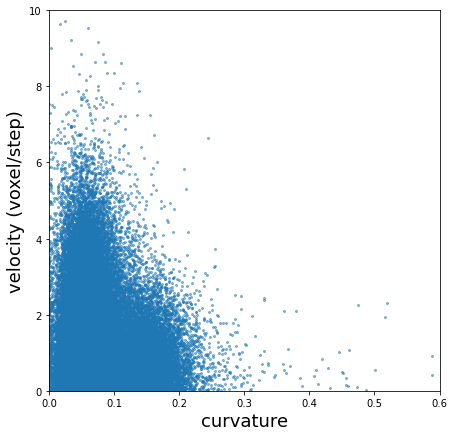

<Figure size 432x288 with 0 Axes>

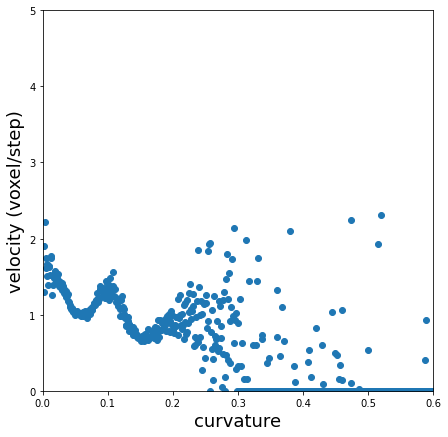

In [47]:
    # All in 1 figrue
    velocity_1Dlist = []
    curvature_1Dlist = []
    curvature_1Dlist_remove_0step = []
    velocity_1Dlist_remove_0step = []
    for i in range(len(GB_list_velocity_list)): 
        velocity_1Dlist.extend(GB_list_velocity_list[i])
        curvature_1Dlist.extend(GB_list_curvature_list[i])
        if i > 0: 
            curvature_1Dlist_remove_0step.extend(GB_list_curvature_list[i])
            velocity_1Dlist_remove_0step.extend(GB_list_velocity_list[i])
    figure_name_all = f"figures/2D_velocity_curvature_M_{case_name}_5d.png"
    plt.figure()
    fig = plt.figure(figsize=(7, 7))
    plt.scatter(curvature_1Dlist_remove_0step, velocity_1Dlist_remove_0step,s=4,alpha=0.5)
    plt.xlabel("curvature", fontsize=18)
    plt.ylabel("velocity (voxel/step)", fontsize=18)
    plt.xlim([0,0.6])
    plt.ylim([0,10])
    # plt.xlim([0,0.1])
    # plt.ylim([0,20])
    plt.savefig(figure_name_all, dpi=400,bbox_inches='tight')
    
    # plot velocity VS averaged curvature
    bin_interval = 0.001
    bin_number = int(0.6/bin_interval)
    curvature_coordinate = np.arange(0,0.6,bin_interval)+bin_interval/2

    curvature_bin = np.zeros(bin_number)
    velocity_bin = np.zeros(bin_number)
    for index in range(len(curvature_1Dlist_remove_0step)):
        if curvature_1Dlist_remove_0step[index]>0.6: continue
        curvature_bin[int(curvature_1Dlist_remove_0step[index]//bin_interval)] += 1
        velocity_bin[int(curvature_1Dlist_remove_0step[index]//bin_interval)] += velocity_1Dlist_remove_0step[index]
    for i in range(bin_number): 
        if curvature_bin[i]>0: velocity_bin[i] = velocity_bin[i]/curvature_bin[i]
    # plot
    figure_name_all_bin = f"figures/2D_velocity_curvature_M_{case_name}_5d_afterBin.png"
    plt.figure()
    fig = plt.figure(figsize=(7, 7))
    # plt.scatter(curvature_coordinate, velocity_bin,s=4,alpha=0.5)
    plt.plot(curvature_coordinate, velocity_bin,'o', linewidth=2)
    plt.xlabel("curvature", fontsize=18)
    plt.ylabel("velocity (voxel/step)", fontsize=18)
    plt.xlim([0,0.6])
    plt.ylim([0,5])
    plt.savefig(figure_name_all_bin, dpi=400,bbox_inches='tight')


/scratch/local/26947664/ipykernel_3966897/2289472195.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

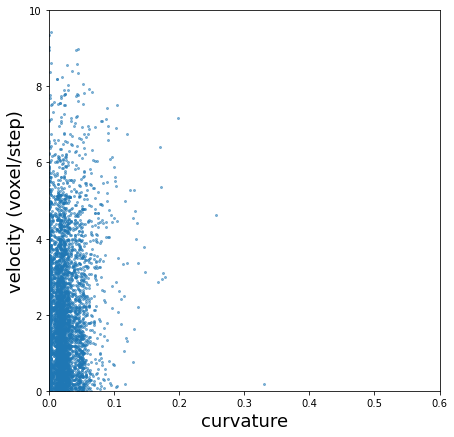

<Figure size 432x288 with 0 Axes>

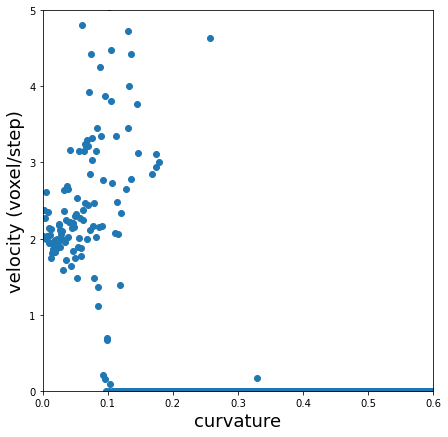

<Figure size 432x288 with 0 Axes>

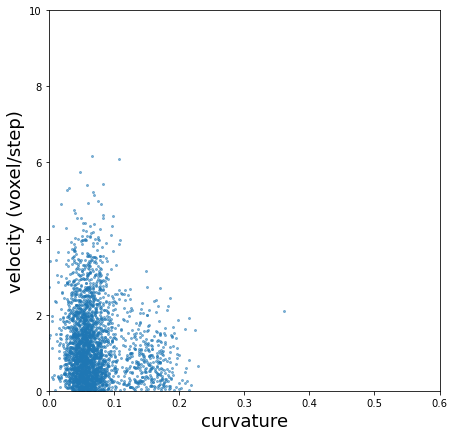

<Figure size 432x288 with 0 Axes>

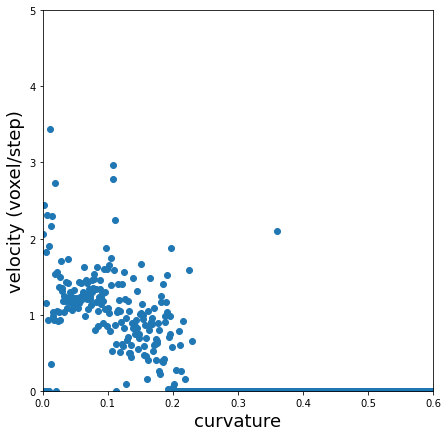

<Figure size 432x288 with 0 Axes>

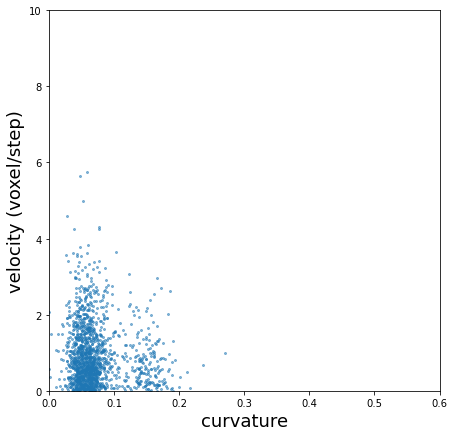

<Figure size 432x288 with 0 Axes>

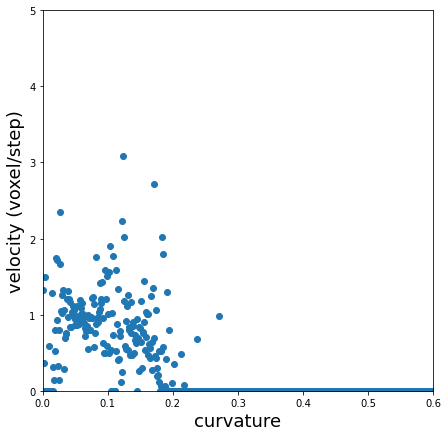

<Figure size 432x288 with 0 Axes>

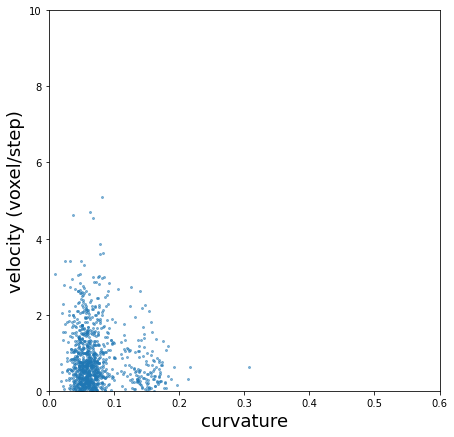

<Figure size 432x288 with 0 Axes>

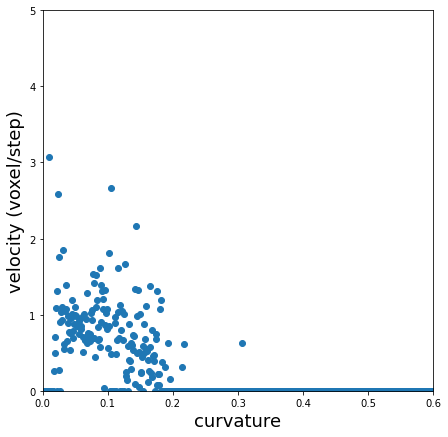

<Figure size 432x288 with 0 Axes>

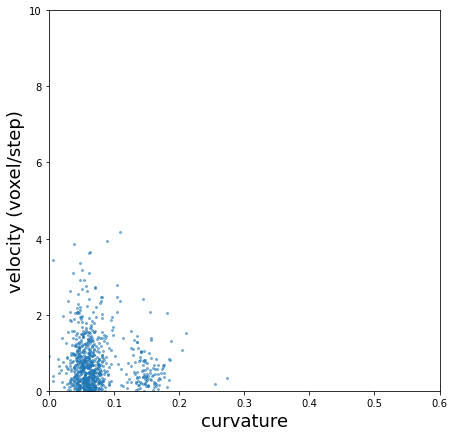

<Figure size 432x288 with 0 Axes>

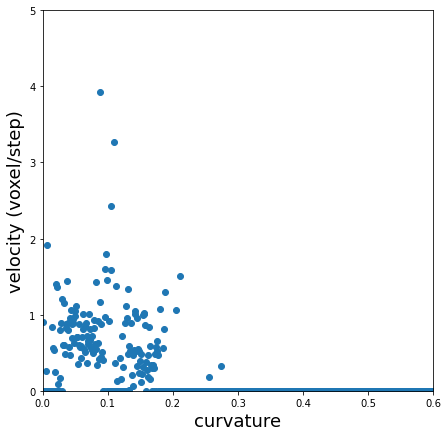

<Figure size 432x288 with 0 Axes>

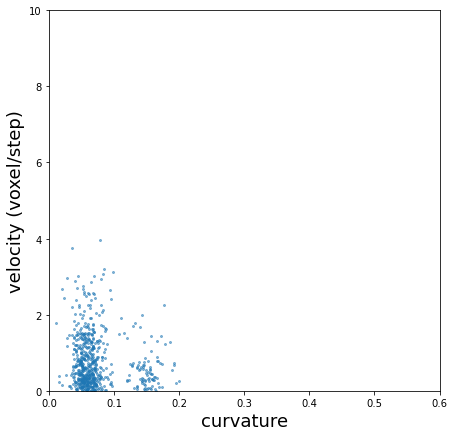

<Figure size 432x288 with 0 Axes>

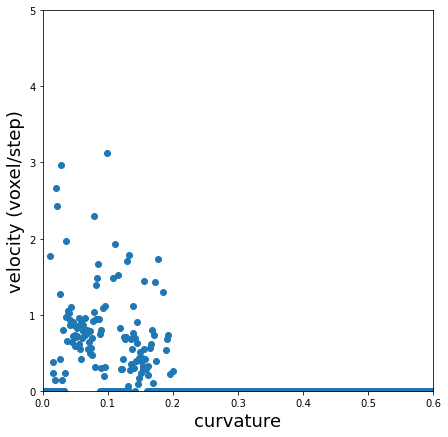

<Figure size 432x288 with 0 Axes>

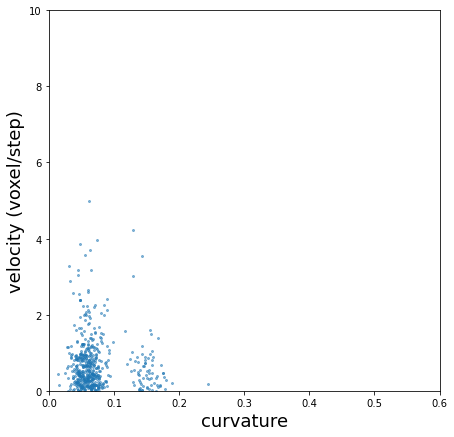

<Figure size 432x288 with 0 Axes>

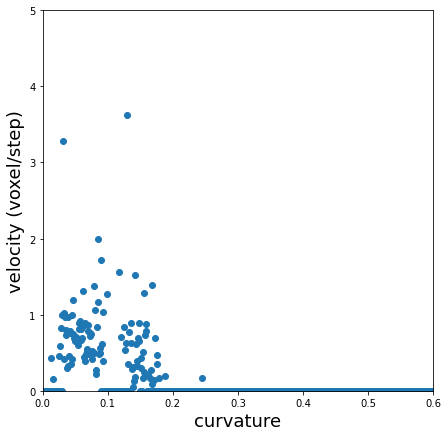

<Figure size 432x288 with 0 Axes>

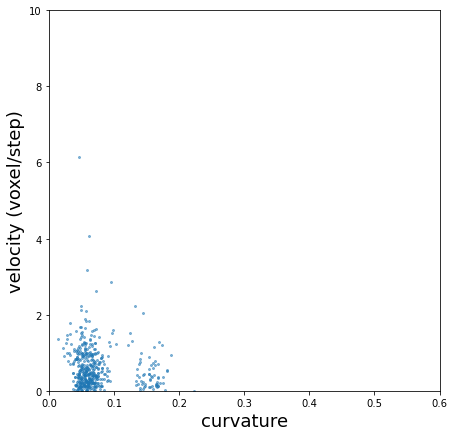

<Figure size 432x288 with 0 Axes>

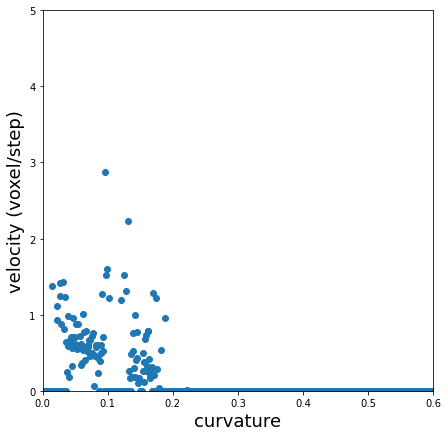

<Figure size 432x288 with 0 Axes>

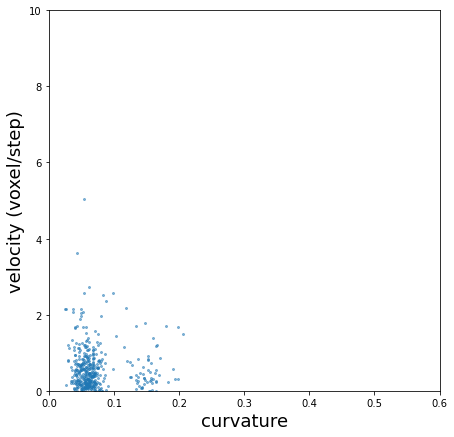

<Figure size 432x288 with 0 Axes>

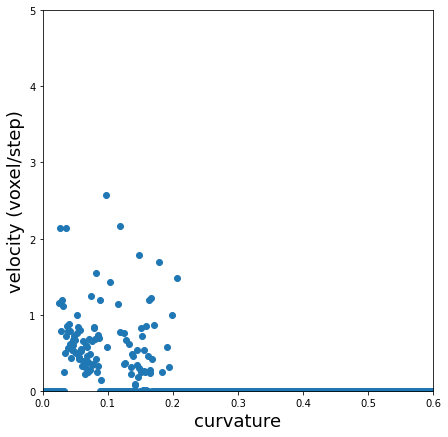

<Figure size 432x288 with 0 Axes>

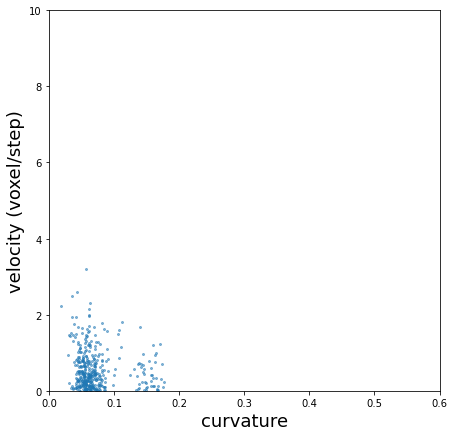

<Figure size 432x288 with 0 Axes>

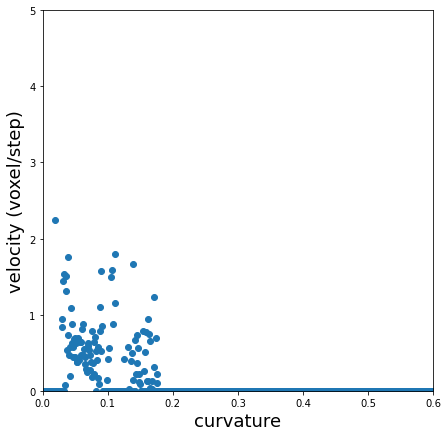

<Figure size 432x288 with 0 Axes>

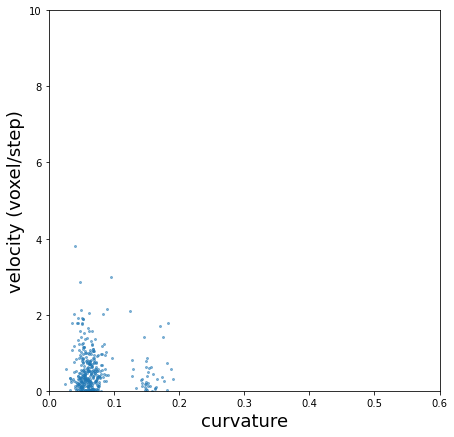

<Figure size 432x288 with 0 Axes>

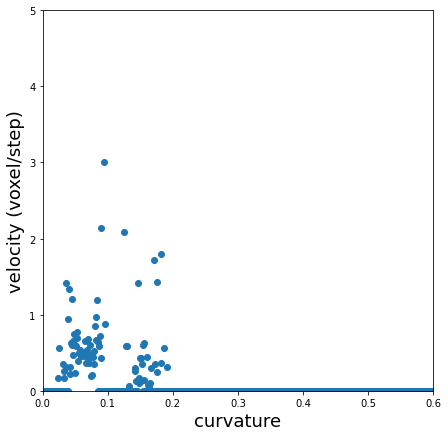

<Figure size 432x288 with 0 Axes>

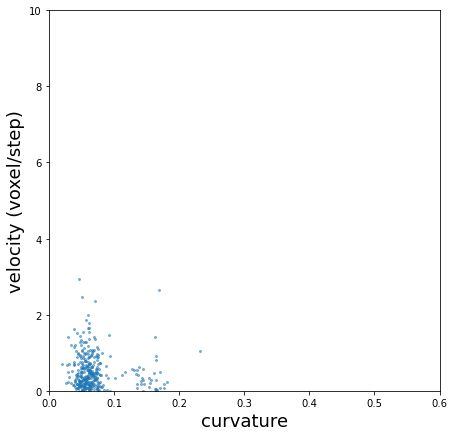

<Figure size 432x288 with 0 Axes>

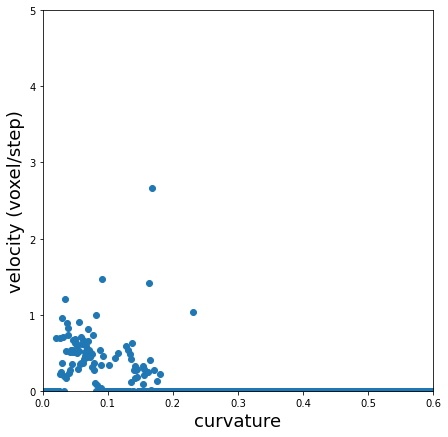

In [46]:
    # Plot relationship for each time steps
    for time_step in range(0,len(GB_list_velocity_list),10):
        figure_name = f"figures/2D_velocity_curvature_M_step{time_step}_{case_name}.png"
        plt.figure()
        fig = plt.figure(figsize=(7, 7))
        plt.scatter(GB_list_curvature_list[time_step], GB_list_velocity_list[time_step],s=4,alpha=0.5)
        plt.xlabel("curvature", fontsize=18)
        plt.ylabel("velocity (voxel/step)", fontsize=18)
        plt.xlim([0,0.6])
        plt.ylim([0,10])
        plt.savefig(figure_name, dpi=400,bbox_inches='tight')
        
        # plot velocity VS averaged curvature
        bin_interval = 0.001
        bin_number = int(0.6/bin_interval)
        curvature_coordinate = np.arange(0,0.6,bin_interval)+bin_interval/2

        curvature_bin = np.zeros(bin_number)
        velocity_bin = np.zeros(bin_number)
        for index in range(len(GB_list_curvature_list[time_step])):
            if GB_list_curvature_list[time_step][index]>0.6: continue
            curvature_bin[int(GB_list_curvature_list[time_step][index]//bin_interval)] += 1
            velocity_bin[int(GB_list_curvature_list[time_step][index]//bin_interval)] += GB_list_velocity_list[time_step][index]
        for i in range(bin_number): 
            if curvature_bin[i]>0: velocity_bin[i] = velocity_bin[i]/curvature_bin[i]
        # plot
        figure_name_all_bin = f"figures/2D_velocity_curvature_M_step{time_step}_{case_name}_afterBin.png"
        plt.figure()
        fig = plt.figure(figsize=(7, 7))
        # plt.scatter(curvature_coordinate, velocity_bin,s=4,alpha=0.5)
        plt.plot(curvature_coordinate, velocity_bin,'o', linewidth=2)
        plt.xlabel("curvature", fontsize=18)
        plt.ylabel("velocity (voxel/step)", fontsize=18)
        plt.xlim([0,0.6])
        plt.ylim([0,5])
        plt.savefig(figure_name_all_bin, dpi=400,bbox_inches='tight')

## Plot curvature matrix

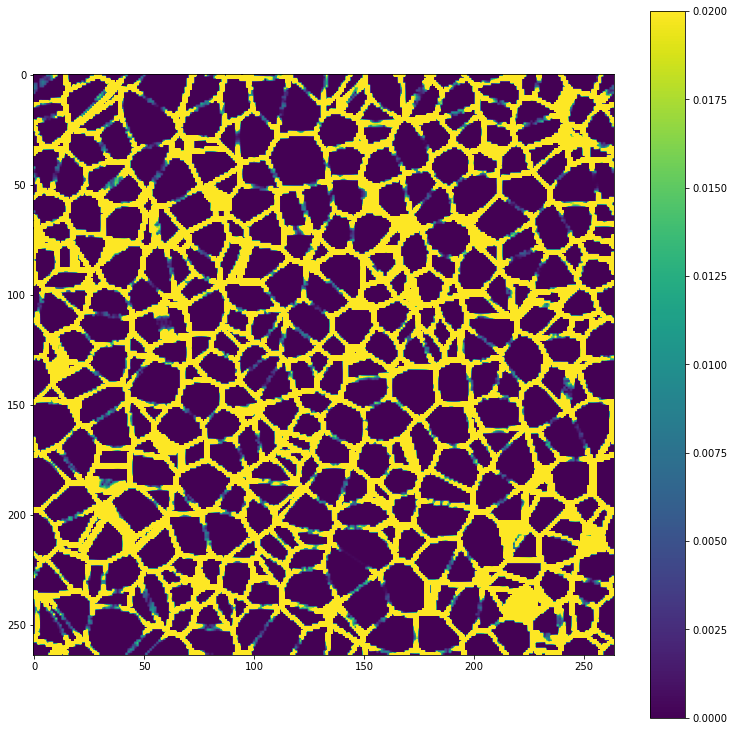

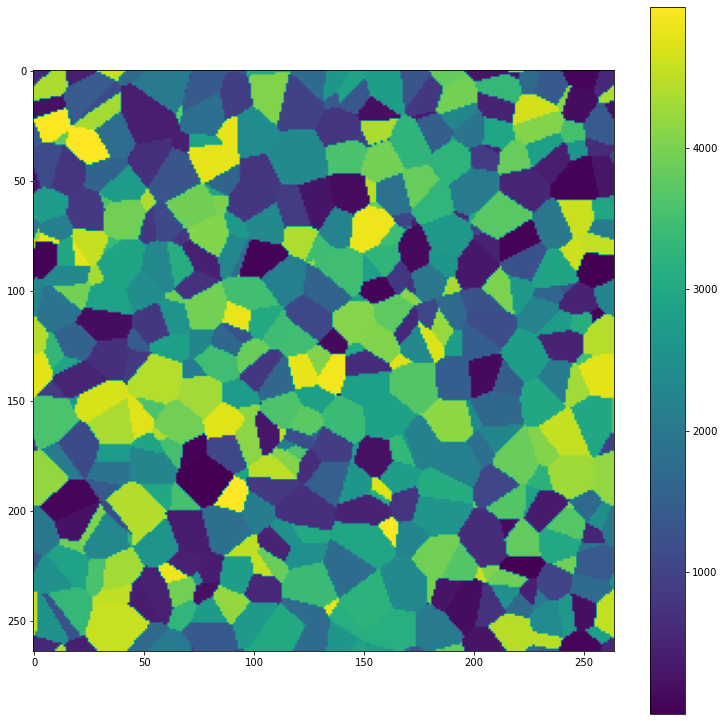

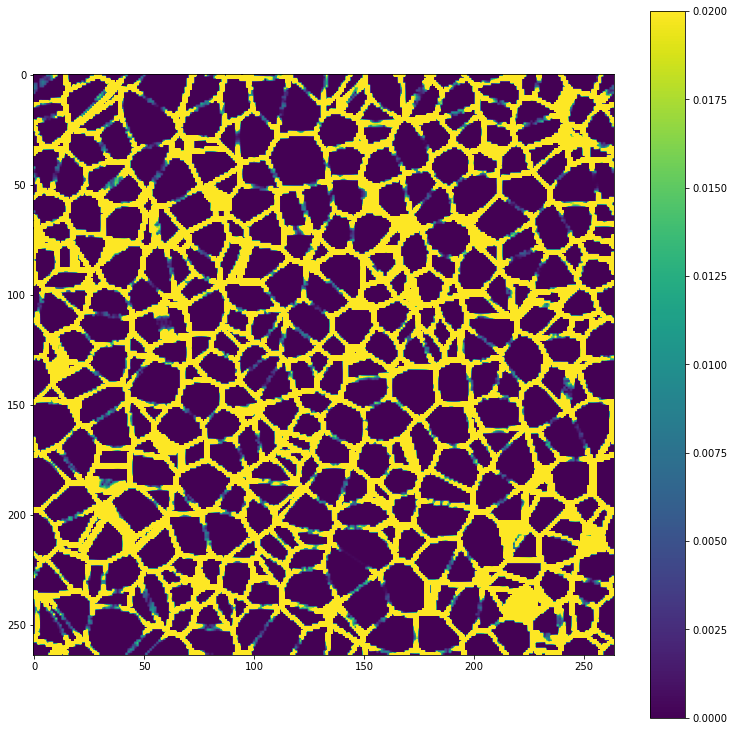

In [146]:
data_curvature_file_name = f"GB_velocity_data/matrix_curvature_data_{case_name}_step0.npz"
test_curvature_matrix_list = np.load(data_file_folder + data_curvature_file_name)["curvature_matrix"]

plt.figure(figsize=(13,13))
plt.imshow(test_curvature_matrix_list[100],vmin=0,vmax=0.02)
plt.colorbar()

plt.figure(figsize=(13,13))
plt.imshow(npy_file_aniso[0][100])
plt.colorbar()

cores = 128
loop_times = 5
R = np.zeros((size_x,size_y,size_z,4))
smoothing_class = Linear_3D.linear3d_class(size_x,size_y,size_z,grain_nums,cores,loop_times,npy_file_aniso[0],R,'p')
smoothing_class.linear3d_main("curvature")
C_ln = smoothing_class.get_C()
curvature_matrix = C_ln[1,:]

plt.figure(figsize=(13,13))
plt.imshow(curvature_matrix[100],vmin=0,vmax=0.02)
plt.colorbar()